# Experiments of the paper: "Advancing SQL Injection Detection for High-Speed Data Centers: A Novel Approach Using Cascaded NLP"

This code can run on Google Colab or local Jupyter Notebook <a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1).

*   The default experiments takes too long. Please have a look at config.ini before running the tests.
*   If you only want to demonstrate the old results, run only the [Visualize the results](#visualize-the-results) part down below this notebook.

<a name="cite_note-1"></a>1. [^](#cite_ref-1): The latest version is not tested on local notebook.

## Download the codes and dataset from github

In [ ]:
import os

# Check if the code is running on Google Colab
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

# Clone and rename the repo
if IN_COLAB:
  print("You are using Google Colab.")
  #DEBUG!!!!! clone branch ini degistir
  !git clone -b colab https://github.com/gdrlab/cascaded-sqli-detection.git
  print("Renaming folder cascaded-sqli-detection to cascaded_sqli_detection")
  !mv cascaded-sqli-detection cascaded_sqli_detection
else:
  print("You are not using Google Colab. Make sure to install necessary libraries (use sqli-env.yml and Mamba) and Git (https://git-scm.com/downloads)")
  #DEBUG!!!!! clone branch ini degistir
  os.system('git clone -b colab https://github.com/gdrlab/cascaded-sqli-detection.git')
  print("Renaming folder cascaded-sqli-detection to cascaded_sqli_detection")
  os.rename('cascaded-sqli-detection', 'cascaded_sqli_detection')

%cd cascaded_sqli_detection

In [ ]:
from pathlib import Path
#main_folder = Path('/content/drive/MyDrive/Akademik/Research and Projects/Sakir Hoca Projects/AI Security Intelligence/Codes/20230525_sqli_colab')
main_folder = Path().absolute()

In [ ]:
#%cd $main_folder
%ls -lah

/content/drive/MyDrive/Akademik/Research and Projects/Sakir Hoca Projects/AI Security Intelligence/Codes/20230525_sqli_colab
total 304K
-rw------- 1 root root 3.6K May 23 14:01 classical_models.py
-rw------- 1 root root 1.2K May 30 11:02 config.ini
drwx------ 2 root root 4.0K May 11 11:42 datasets/
-rw------- 1 root root 7.7K May 23 14:01 ensemble_models.py
-rw------- 1 root root  20K May 25 12:48 experiments.py
-rw------- 1 root root  813 Apr 17 09:08 .gitignore
-rw------- 1 root root    3 Apr  3 11:59 LICENSE.md
-rw------- 1 root root 236K May 31 14:23 main.ipynb
drwx------ 2 root root 4.0K May 25 13:15 __pycache__/
-rw------- 1 root root 5.4K May 11 10:49 README.md
drwx------ 2 root root 4.0K May 25 13:06 results/
-rw------- 1 root root 1.3K May 25 15:31 run_classical_MLs.py
-rw------- 1 root root  318 May 11 10:49 sqli-env.yml
-rw------- 1 root root 6.3K May 25 14:56 templates.py
drwx------ 2 root root 4.0K Apr  3 11:59 trained_models/
drwx------ 2 root root 4.0K May 25 13:05 utils

# RUN ALL TESTS
If you want to only visualize the test results, please skip this section and go to [Visualize the results](#visualize-the-results). 

## Initializations

In [ ]:
#%load_ext autoreload
#%autoreload 2

Warning: BERT libraries had problems after Colab system is upgraded. The solution I found is to downgrade numpy. After running the following code, restart the session and check the numpy version. If the libraries are working just fine in future, you can remove the downgrade fix.

In [ ]:
#!pip install -q -U numpy==1.22 --ignore-installed

In [ ]:
import numpy as np
import sklearn
print("numpy: \t\t", np.__version__)
print("sklearn: \t", sklearn.__version__)
!python --version

numpy: 		 1.22.4
sklearn: 	 1.2.2
Python 3.10.11


In [ ]:
# A dependency of the preprocessing for BERT inputs
#!pip install  -q -U "tensorflow-text==2.8.*"
!pip install  -q -U "tensorflow-text"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 83.6 MB/s eta 0:00:00


In [ ]:
#!pip install -q tf-models-official==2.7.0
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 23.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 91.8 MB/s eta 0:00:00


In [ ]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.2.2.


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
from pathlib import Path
from datetime import datetime
import os
import shutil


import matplotlib.pyplot as plt

import pandas as pd
import time


import time
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

from experiments import evaluate, save_results

print('Pandas v', pd.__version__)
#tf.get_logger().setLevel('ERROR')

Pandas v 1.5.3


In [ ]:
 !nvidia-smi

Wed May 31 14:24:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    45W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import configparser
from templates import DataManager, logger
config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

In [ ]:
config.get('models', 'classic_models').split(',')

['MultinomialNB']

In [ ]:
data_manager = DataManager(config)

In [ ]:
#%%script echo skipping
results_dir = Path(config['results']['dir'])

currentDateAndTime = datetime.now()
currentTime = currentDateAndTime.strftime("%y%m%d_%H%M%S")
file_name = f'results_{currentTime}.csv'
output_file = main_folder / results_dir / file_name
proposed_test_results_file = main_folder / results_dir / f'proposed_method_results_{currentTime}.csv'
print(f"All results:{output_file.absolute()}")
print(f"Proposed method results:{proposed_test_results_file.absolute()}")



All results:/content/drive/MyDrive/Akademik/Research and Projects/Sakir Hoca Projects/AI Security Intelligence/Codes/20230525_sqli_colab/results/results_230531_142518.csv
Proposed method results:/content/drive/MyDrive/Akademik/Research and Projects/Sakir Hoca Projects/AI Security Intelligence/Codes/20230525_sqli_colab/results/proposed_method_results_230531_142518.csv


## Classical ML (Single NLP) tests

In [ ]:
!python run_classical_MLs.py -o $file_name

05-30-2023 11:04:54 l:27| Loaded dataset with 30609 rows.
Running the tests for seed: 13
Feature extractors:   0% 0/1 [00:00<?, ?it/s]05-30-2023 11:04:54 l:83| running 1 of 1 feature extractors.
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:563: UserWarning: The parameter 'tokenizer' will not be used since 'analyzer' != 'word'
  warnings.warn(

Models:   0% 0/1 [00:00<?, ?it/s]05-30-2023 11:04:56 l:91| running 1 of 1 models.
05-30-2023 11:04:56 l:151| Training model: MultinomialNB
05-30-2023 11:04:56 l:159| Ended training MultinomialNB in: 0.01803496399998039s
Models: 100% 1/1 [00:00<00:00, 29.6

## LLM (BERT) tests

In [ ]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
# Manual selection
bert_model_name_list = ['bert_en_uncased_L-12_H-768_A-12', 
                        'bert_en_cased_L-12_H-768_A-12',
                        'small_bert/bert_en_uncased_L-2_H-128_A-2',
                        'small_bert/bert_en_uncased_L-4_H-512_A-8',
                        'small_bert/bert_en_uncased_L-8_H-128_A-2',
                        'small_bert/bert_en_uncased_L-12_H-768_A-12',
                        'bert_multi_cased_L-12_H-768_A-12',
                       'albert_en_base',
                        'electra_base',
                        'electra_small']

In [ ]:
def build_classifier_model(local_tfhub_handle_preprocess, local_tfhub_handle_encoder):
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='Payload')
  preprocessing_layer = hub.KerasLayer(local_tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(local_tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
data_manager.x_train.shape[0]

24487

In [ ]:
#main_dir = Path('/content/drive/MyDrive/Colab Notebooks/kasim/2023 Feb Bert SQLi/')
# 'SQLiV3_train.tsv', 'SQLiV3_test.tsv'
# 'NEW_normal_plus_waf_bypass_dataset_testing.tsv'
# 'NEW_normal_plus_waf_bypass_dataset_training.tsv'
#train_file_name = 'NEW_normal_plus_waf_bypass_dataset_training.tsv'
#train_file_name = 'SQLiV3_train.tsv'
#test_file_name = 'SQLiV3_test.tsv'
#train_file = Path(main_dir / train_file_name)
#test_file = Path(main_dir / test_file_name)

#print(f'Train file exists: {train_file.is_file()}')
#print(f'Test file exists: {test_file.is_file()}')


currentDateAndTime = datetime.now()
currentTime = currentDateAndTime.strftime("%y%m%d_%H%M%S")
#recording = Recorder(main_folder / results_dir / f'results_BERT_{currentTime}.csv')


AUTOTUNE = tf.data.AUTOTUNE
batch_size = 16
#seed = 42

x_train = data_manager.x_train
y_train = data_manager.y_train
x_test = data_manager.x_test
y_test = data_manager.y_test

# Create TensorFlow datasets for the training and validation sets
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(8)
val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(8)

# Cache the training and validation datasets
train_dataset = train_dataset.cache()
val_dataset = val_dataset.cache()


# Prefetch the training and validation datasets
train_ds = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_ds = val_dataset.prefetch(buffer_size=AUTOTUNE)



#train_ds = test_csv_ds.cache().prefetch(buffer_size=AUTOTUNE)
#val_ds = test_csv_ds.cache().prefetch(buffer_size=AUTOTUNE)
# test_ds = val_ds

class_names = ['payload','label']



In [ ]:
tmp = train_ds.take(1)
for i in next(iter(tmp)):
  print(i)

tf.Tensor(
[b'9869'
 b"1'||  (  select 'mdqc' where 4533  =  4533 and 8189  =    (  select count  (  *  )   from sysibm.systables as t1,sysibm.systables as t2,sysibm.systables as t3  )  --"
 b"1'   )    )     )   and sleep  (  5  )  #"
 b'1 where 8578  =  8578 and 4770  =  4474--'
 b'SELECT COUNT ( officer ) FROM suddenly'
 b"-5597'  )   or make_set  (  2490  =  2164,2164  )  "
 b'SELECT TOP 50 PERCENT * FROM vote SELECT * FROM simplest FETCH FIRST 50 PERCENT ROWS ONLYSELECT TOP 3 * FROM test'
 b'calle alfred nobel, 42 7-g'], shape=(8,), dtype=string)
tf.Tensor([0 1 1 1 0 1 0 0], shape=(8,), dtype=int64)


In [ ]:
# Data manager _ split with seed
from sklearn.model_selection import train_test_split

def split_dataset(seed=42):
  split_ratio = float(data_manager.config['data_manager']['split_ratio'])

  data_manager.train, data_manager.test = train_test_split(
    data_manager.dataset, test_size=split_ratio, random_state=seed)

  data_manager.x_train = data_manager.train['payload'].values
  data_manager.x_test = data_manager.test['payload'].values
  data_manager.y_train = data_manager.train['label'].values
  data_manager.y_test = data_manager.test['label'].values

  data_manager.notes = {
    'seed': seed,
    'split_ratio': split_ratio,
    'train_size': len(data_manager.train),
    'test_size': len(data_manager.test),
  }

#split_dataset(seed=666)
#print(data_manager.notes['seed'])

In [ ]:
seeds = [13, 27, 42, 72, 84]# 34, 1984, 1994, 77]
#seeds = [13]
for seed in seeds:
  print('######################################')
  print(f"seed:{seed}")
  split_dataset(seed=seed)
  print(data_manager.notes['seed'])

  x_train = data_manager.x_train
  y_train = data_manager.y_train
  x_test = data_manager.x_test
  y_test = data_manager.y_test

  # Create TensorFlow datasets for the training and validation sets
  train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
  val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

  # Cache the training and validation datasets
  train_dataset = train_dataset.cache()
  val_dataset = val_dataset.cache()


  # Prefetch the training and validation datasets
  train_ds = train_dataset.prefetch(buffer_size=AUTOTUNE)
  test_ds = val_dataset.prefetch(buffer_size=AUTOTUNE)

  class_names = ['payload','label']


  for bert_model_name in bert_model_name_list:
    #bert_model_name = bert_model_name_list[0]
    print('****************************************************')
    #recording.set_current_method(f"{bert_model_name}" )
    tfhub_handle_encoder = map_name_to_handle[bert_model_name]
    tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

    print(f'BERT model selected           : {tfhub_handle_encoder}')
    print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')


    bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
    bert_model = hub.KerasLayer(tfhub_handle_encoder)
    classifier_model = build_classifier_model(tfhub_handle_preprocess, tfhub_handle_encoder)

    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    metrics = tf.metrics.BinaryAccuracy()

    epochs = 10 #modify this
    #steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
    steps_per_epoch = data_manager.x_train.shape[0]
    num_train_steps = (steps_per_epoch * epochs) #//200 
    num_warmup_steps = int(0.1*num_train_steps)

    init_lr = 3e-5
    optimizer = optimization.create_optimizer(init_lr=init_lr,
                                              num_train_steps=num_train_steps,
                                              num_warmup_steps=num_warmup_steps,
                                              optimizer_type='adamw')

    classifier_model.compile(optimizer=optimizer,
                            loss=loss,
                            metrics=metrics)


    print(f'Training model with {tfhub_handle_encoder}')
    start_time = time.time()
    history = classifier_model.fit(x=train_ds, #train_ds.take(2)
                                  validation_data=test_ds, # validation_data=test_ds.take(2),
                                  epochs=epochs)
    stop_time = time.time()
    training_time = (stop_time - start_time)*1000 / data_manager.notes['train_size']

    loss, accuracy = classifier_model.evaluate(test_ds)

    print(f'Loss: {loss}')
    print(f'Accuracy: {accuracy}')

    start_time = time.time()
    y_pred = classifier_model.predict(test_ds)
    stop_time = time.time()
    testing_time = (stop_time - start_time)*1000 / data_manager.notes['test_size']
    y_pred_np = tf.cast(tf.sigmoid(y_pred) > 0.5, tf.int32).numpy()
    X, y_true = zip(*test_ds.unbatch())
    y_true_np = [y.numpy() for y in y_true]
    #precision, recall, f1, support = precision_recall_fscore_support(y_true_np, y_pred_np, average='binary')
    #tn, fp, fn, tp = confusion_matrix(y_true_np, y_pred_np).ravel()

    notes = {'feature_method': bert_model_name,'model': bert_model_name, 
            'seed': data_manager.notes['seed'], 
            'split_ratio': data_manager.notes['split_ratio'],
            'train_size': data_manager.notes['train_size'],
            'test_size': data_manager.notes['test_size'],
            'extraction_time':0, 'feature_size':0,
            'train_time': training_time,
            'pred_time': testing_time, 'dataset': config['dataset']['file']}
    result = evaluate(y_true_np, y_pred_np, notes)
    print(result)
    save_results([result], output_file)


######################################
seed:13
13
****************************************************
BERT model selected           : https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3
Training model with https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Epoch 1/10
1531/1531 [==============================] - 151s 85ms/step - loss: 0.3231 - binary_accuracy: 0.8525 - val_loss: 0.0111 - val_binary_accuracy: 0.9977
Epoch 2/10
1531/1531 [==============================] - 129s 84ms/step - loss: 0.0152 - binary_accuracy: 0.9967 - val_loss: 0.0104 - val_binary_accuracy: 0.9980
Epoch 3/10
1531/1531 [==============================] - 129s 84ms/step - loss: 0.0093 - binary_accuracy: 0.9981 - val_loss: 0.0107 - val_binary_accuracy: 0.9984
Epoch 4/10
1531/1531 [==============================] - 129s 84ms/step - loss: 0.0056 - binary_accuracy: 0.9988 - val_loss: 0.0205 - val_binary_ac

## The Proposed Cascade NLP (two-stage) SQLi Detection Tests

### First Stage - Classical ML

In [ ]:
from templates import FeatureExtractor
from classical_models import Classical_Model
from pprint import pprint
from experiments import evaluate

xgboost_threshold = 0.05 #prediction
scale_pos_weight = 5000.0 #xgboost model parameter

pass_aggressive_threshold = -0.3 #prediction
class_weights = {1: 0.999, 0: 0.001} #PassiveAggressiveClassifier model parameter

feature_method = 'tf-idf_ngram'
#model_name = 'XGBoost'
#model_name = 'PassiveAggressiveClassifier'

In [ ]:

# Train and evaluate the first stage
def first_stage_passive_aggressive():
  model_name = 'PassiveAggressiveClassifier'
  feature_extractor = FeatureExtractor(feature_method)
  start_time = time.time()
  feature_extractor.extract_features(
      data_manager.x_train, data_manager.x_test)
  stop_time = time.time()
  extraction_time = ((stop_time - start_time)*1000 
                    / (len(data_manager.x_train) + len(data_manager.x_test)) )

  model = Classical_Model(model_name, class_weight=class_weights) #MODIFY IT if you change the model
  model.feature_method = feature_extractor.method
  start_time = time.time()
  model.fit(
      feature_extractor.features['train'], 
      data_manager.y_train) #scale_pos_weight=5.0
  stop_time = time.time()
  training_time = (stop_time - start_time)*1000 / feature_extractor.features['train'].shape[0]


  start_time = time.time()
  first_stage_y_pred = model.predict(feature_extractor.features['test'],  pass_aggressive_threshold=pass_aggressive_threshold)
  stop_time = time.time()

  testing_time = (stop_time - start_time)*1000 / feature_extractor.features['test'].shape[0]

  notes = {'feature_method': feature_extractor.method,'model': model_name, 
            'seed': data_manager.notes['seed'], 
            'split_ratio': data_manager.notes['split_ratio'],
            'train_size': data_manager.notes['train_size'],
            'test_size': data_manager.notes['test_size'],
            'extraction_time':extraction_time, 'feature_size': feature_extractor.features['train'].shape[1],
            'train_time': training_time,
            'pred_time': testing_time, 'dataset': config['dataset']['file'],
          'class_weights':class_weights,
          'pass_aggressive_threshold': pass_aggressive_threshold
          }
  # Save results to csv file

  result = evaluate(data_manager.y_test, first_stage_y_pred, notes=notes)
  pprint(result)
  save_results([result], proposed_test_results_file)

  # Extract the positive predicitions for the second stage
  first_stage_positive_preds = data_manager.x_test[(first_stage_y_pred == 1)]
  first_stage_positive_preds_true_labels = data_manager.y_test[(first_stage_y_pred == 1)]
  fs_pos_len = len(first_stage_positive_preds)
  nof_test_samples = len(data_manager.x_test)
  fs_rat = fs_pos_len/nof_test_samples
  print(f"Positive predicitions in the first stage: {fs_pos_len} out of {nof_test_samples}. Ratio:{fs_rat}")

  return first_stage_positive_preds, first_stage_positive_preds_true_labels

In [ ]:
# Train and evaluate the first stage
def first_stage_xgboost():
  model_name = 'XGBoost'
  feature_extractor = FeatureExtractor(feature_method)
  start_time = time.time()
  feature_extractor.extract_features(
      data_manager.x_train, data_manager.x_test)
  stop_time = time.time()
  extraction_time = ((stop_time - start_time)*1000 
                    / (len(data_manager.x_train) + len(data_manager.x_test)) )

  model = Classical_Model(model_name, scale_pos_weight=scale_pos_weight)
  model.feature_method = feature_extractor.method
  start_time = time.time()
  model.fit(
      feature_extractor.features['train'], 
      data_manager.y_train) #scale_pos_weight=5.0
  stop_time = time.time()
  training_time = (stop_time - start_time)*1000 / feature_extractor.features['train'].shape[0]


  start_time = time.time()
  first_stage_y_pred = model.predict(feature_extractor.features['test'], xgboost_threshold=xgboost_threshold)
  stop_time = time.time()

  testing_time = (stop_time - start_time)*1000 / feature_extractor.features['test'].shape[0]

  notes = {'feature_method': feature_extractor.method,'model': model_name, 
            'seed': data_manager.notes['seed'], 
            'split_ratio': data_manager.notes['split_ratio'],
            'train_size': data_manager.notes['train_size'],
            'test_size': data_manager.notes['test_size'],
            'extraction_time':extraction_time, 'feature_size': feature_extractor.features['train'].shape[1],
            'train_time': training_time,
            'pred_time': testing_time, 'dataset': config['dataset']['file'],
          'scale_pos_weight':scale_pos_weight,
          'xgboost_threshold': xgboost_threshold
          }
  # Save results to csv file

  result = evaluate(data_manager.y_test, first_stage_y_pred, notes=notes)
  pprint(result)
  save_results([result], proposed_test_results_file)

  # Extract the positive predicitions for the second stage
  first_stage_positive_preds = data_manager.x_test[(first_stage_y_pred == 1)]
  first_stage_positive_preds_true_labels = data_manager.y_test[(first_stage_y_pred == 1)]
  fs_pos_len = len(first_stage_positive_preds)
  nof_test_samples = len(data_manager.x_test)
  fs_rat = fs_pos_len/nof_test_samples
  print(f"Positive predicitions in the first stage: {fs_pos_len} out of {nof_test_samples}. Ratio:{fs_rat}")

  return first_stage_positive_preds, first_stage_positive_preds_true_labels

### Second Stage - BERT

In [ ]:
def second_stage(first_stage_positive_preds, first_stage_positive_preds_true_labels):
  # Prepare the training Dataset 
  currentDateAndTime = datetime.now()
  currentTime = currentDateAndTime.strftime("%y%m%d_%H%M%S")
  #recording = Recorder(main_folder / results_dir / f'results_BERT_{currentTime}.csv')


  AUTOTUNE = tf.data.AUTOTUNE
  batch_size = 8
  #seed = 42

  x_train = data_manager.x_train
  y_train = data_manager.y_train
  x_test = data_manager.x_test
  y_test = data_manager.y_test

  # Create TensorFlow datasets for the training and validation sets
  train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
  val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

  # Cache the training and validation datasets
  train_dataset = train_dataset.cache()
  val_dataset = val_dataset.cache()


  # Prefetch the training and validation datasets
  train_ds = train_dataset.prefetch(buffer_size=AUTOTUNE)
  test_ds = val_dataset.prefetch(buffer_size=AUTOTUNE)

  class_names = ['payload','label']

  # First, train the BERT model.

  print('****************************************************')
  #bert_model_name = 'bert_en_uncased_L-12_H-768_A-12'
  #bert_model_name = 'small_bert/bert_en_uncased_L-8_H-128_A-2'#smallest Recall
  bert_model_name = 'electra_base'#smallest Recall

  tfhub_handle_encoder = map_name_to_handle[bert_model_name]
  tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

  print(f'BERT model selected           : {tfhub_handle_encoder}')
  print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')


  bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
  bert_model = hub.KerasLayer(tfhub_handle_encoder)
  second_stage_classifier_model = build_classifier_model(tfhub_handle_preprocess, tfhub_handle_encoder)

  loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
  metrics = tf.metrics.BinaryAccuracy()

  epochs = 10 #DEBUG MODIFY ME
  #steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
  steps_per_epoch = data_manager.x_train.shape[0]
  num_train_steps = (steps_per_epoch * epochs) #//200 
  num_warmup_steps = int(0.1*num_train_steps)

  init_lr = 3e-5
  optimizer = optimization.create_optimizer(init_lr=init_lr,
                                            num_train_steps=num_train_steps,
                                            num_warmup_steps=num_warmup_steps,
                                            optimizer_type='adamw')

  second_stage_classifier_model.compile(optimizer=optimizer,
                          loss=loss,
                          metrics=metrics)


  print(f'Training model with {tfhub_handle_encoder}')
  start_time = time.time()
  history = second_stage_classifier_model.fit(x=train_ds, # x=train_ds.take(2), 
                                validation_data=test_ds, # validation_data=test_ds.take(2), 
                                epochs=epochs)
  stop_time = time.time()
  training_time = (stop_time - start_time)*1000 / data_manager.notes['train_size']

  # Prepare first stage outputs for the second stage
  print(len(first_stage_positive_preds)) #np array
  print(len(first_stage_positive_preds_true_labels)) # np array

  # Create TensorFlow datasets for the prediction set
  pred_dataset = tf.data.Dataset.from_tensor_slices(
      (first_stage_positive_preds, first_stage_positive_preds_true_labels)).batch(batch_size)

  # Cache the pred dataset
  pred_dataset = pred_dataset.cache()

  # Prefetch the pred datasets
  first_stage_pos_preds = pred_dataset.prefetch(buffer_size=AUTOTUNE)

  # Predict only positive outputs of the first stage
  start_time = time.time()
  y_pred = second_stage_classifier_model.predict(first_stage_pos_preds)#.take(2))
  stop_time = time.time()
  testing_time = (stop_time - start_time)*1000 / len(first_stage_positive_preds) 
  y_pred_np = tf.cast(tf.sigmoid(y_pred) > 0.5, tf.int32).numpy()
  X, y_true = zip(*first_stage_pos_preds.unbatch())# take(2).
  y_true_np = [y.numpy() for y in y_true]
  #precision, recall, f1, support = precision_recall_fscore_support(y_true_np, y_pred_np, average='binary')
  #tn, fp, fn, tp = confusion_matrix(y_true_np, y_pred_np).ravel()

  notes = {'feature_method': bert_model_name,'model': bert_model_name, 
            'seed': data_manager.notes['seed'], 
            'split_ratio': data_manager.notes['split_ratio'],
            'train_size': data_manager.notes['train_size'],
            'test_size': data_manager.notes['test_size'],
            'extraction_time':0, 'feature_size':0,
            'train_time': training_time,
            'pred_time': testing_time, 'dataset': config['dataset']['file']}
  result = evaluate(y_true_np, y_pred_np, notes)
  pprint(result)
  save_results([result], proposed_test_results_file)


In [ ]:
# Run first and second stages with different seeds:
seeds = [13, 27, 42, 72, 84]# 34, 1984, 1994, 77]
#seeds = [13]
for seed in seeds:
  print('######################################')
  print(f"seed:{seed}")
  split_dataset(seed=seed)
  print(data_manager.notes['seed'])
  #first_stage_y_pred, first_stage_positive_preds_true_labels = first_stage_xgboost()
  first_stage_y_pred, first_stage_positive_preds_true_labels = first_stage_passive_aggressive()
  second_stage(first_stage_y_pred, first_stage_positive_preds_true_labels)

######################################
seed:13
13


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:563: UserWarning: The parameter 'tokenizer' will not be used since 'analyzer' != 'word'
  warnings.warn(


{'accuracy': 0.9893825547206795,
 'class_weights': {0: 0.001, 1: 0.999},
 'dataset': 'SQLiV3.tsv',
 'extraction_time': 0.07508826811165868,
 'f1_score': 0.9858480296102765,
 'feature_method': 'tf-idf_ngram',
 'feature_size': 29157,
 'fn': 6,
 'fp': 59,
 'model': 'PassiveAggressiveClassifier',
 'pass_aggressive_threshold': -0.3,
 'precision': 0.9746018080068877,
 'pred_time': 0.0005613857918570767,
 'recall': 0.9973568281938326,
 'seed': 13,
 'split_ratio': 0.2,
 'test_size': 6122,
 'tn': 3793,
 'tp': 2264,
 'train_size': 24487,
 'train_time': 0.03603076557036821}
Positive predicitions in the first stage: 2323 out of 6122. Ratio:0.3794511597517151
****************************************************
BERT model selected           : https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3
Training model with https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3
Epoch 1/10
3061/3061 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.025398191993112353,
 'dataset': 'SQLiV3.tsv',
 'extraction_time': 0,
 'f1_score': 0.0,
 'feature_method': 'bert_multi_cased_L-12_H-768_A-12',
 'feature_size': 0,
 'fn': 2264,
 'fp': 0,
 'model': 'bert_multi_cased_L-12_H-768_A-12',
 'precision': 0.0,
 'pred_time': 2.276095859562073,
 'recall': 0.0,
 'seed': 13,
 'split_ratio': 0.2,
 'test_size': 6122,
 'tn': 59,
 'tp': 0,
 'train_size': 24487,
 'train_time': 78.18969141085063}
######################################
seed:27
27


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:563: UserWarning: The parameter 'tokenizer' will not be used since 'analyzer' != 'word'
  warnings.warn(


{'accuracy': 0.98921920940869,
 'class_weights': {0: 0.001, 1: 0.999},
 'dataset': 'SQLiV3.tsv',
 'extraction_time': 0.07317693921507014,
 'f1_score': 0.985645933014354,
 'feature_method': 'tf-idf_ngram',
 'feature_size': 29212,
 'fn': 6,
 'fp': 60,
 'model': 'PassiveAggressiveClassifier',
 'pass_aggressive_threshold': -0.3,
 'precision': 0.9742046431642304,
 'pred_time': 0.0006339784464544816,
 'recall': 0.9973591549295775,
 'seed': 27,
 'split_ratio': 0.2,
 'test_size': 6122,
 'tn': 3790,
 'tp': 2266,
 'train_size': 24487,
 'train_time': 0.033835322547183834}
Positive predicitions in the first stage: 2326 out of 6122. Ratio:0.37994119568768375
****************************************************
BERT model selected           : https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3
Training model with https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3
Epoch 1/10
3061/3061 [

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.025795356835769563,
 'dataset': 'SQLiV3.tsv',
 'extraction_time': 0,
 'f1_score': 0.0,
 'feature_method': 'bert_multi_cased_L-12_H-768_A-12',
 'feature_size': 0,
 'fn': 2266,
 'fp': 0,
 'model': 'bert_multi_cased_L-12_H-768_A-12',
 'precision': 0.0,
 'pred_time': 2.2819560863596555,
 'recall': 0.0,
 'seed': 27,
 'split_ratio': 0.2,
 'test_size': 6122,
 'tn': 60,
 'tp': 0,
 'train_size': 24487,
 'train_time': 77.8370571880346}
######################################
seed:42
42


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:563: UserWarning: The parameter 'tokenizer' will not be used since 'analyzer' != 'word'
  warnings.warn(


{'accuracy': 0.98921920940869,
 'class_weights': {0: 0.001, 1: 0.999},
 'dataset': 'SQLiV3.tsv',
 'extraction_time': 0.07432337980922495,
 'f1_score': 0.9856521739130436,
 'feature_method': 'tf-idf_ngram',
 'feature_size': 29216,
 'fn': 6,
 'fp': 60,
 'model': 'PassiveAggressiveClassifier',
 'pass_aggressive_threshold': -0.3,
 'precision': 0.9742157284056725,
 'pred_time': 0.0005724849906554996,
 'recall': 0.9973603167619886,
 'seed': 42,
 'split_ratio': 0.2,
 'test_size': 6122,
 'tn': 3789,
 'tp': 2267,
 'train_size': 24487,
 'train_time': 0.03616733997348242}
Positive predicitions in the first stage: 2327 out of 6122. Ratio:0.38010454099967333
****************************************************
BERT model selected           : https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3
Training model with https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3
Epoch 1/10
3061/3061 [

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:563: UserWarning: The parameter 'tokenizer' will not be used since 'analyzer' != 'word'
  warnings.warn(


{'accuracy': 0.9877491016007841,
 'class_weights': {0: 0.001, 1: 0.999},
 'dataset': 'SQLiV3.tsv',
 'extraction_time': 0.07466779335792414,
 'f1_score': 0.9837837837837837,
 'feature_method': 'tf-idf_ngram',
 'feature_size': 29275,
 'fn': 6,
 'fp': 69,
 'model': 'PassiveAggressiveClassifier',
 'pass_aggressive_threshold': -0.3,
 'precision': 0.9705631399317406,
 'pred_time': 0.0005537526586483367,
 'recall': 0.9973695747479175,
 'seed': 72,
 'split_ratio': 0.2,
 'test_size': 6122,
 'tn': 3772,
 'tp': 2275,
 'train_size': 24487,
 'train_time': 0.03388086033027111}
Positive predicitions in the first stage: 2344 out of 6122. Ratio:0.38288141130349557
****************************************************
BERT model selected           : https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3
Training model with https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3
Epoch 1/10
3061/3061

# Visualize the results
Please make sure that the correct file and folders are given below. This code doesn't automatically select the latest test results.

In [ ]:
# This code splits the given dataset to test-train files.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import scienceplots
#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
import os

# Apply the default theme
#sns.set_theme()
#sns.set_style('white')
#sns.set_context("paper", font_scale = 2)
#plt.style.use(['science','no-latex'])
print('Pandas v', pd.__version__)

Pandas v 1.3.5


## Configurations

In [ ]:
# Configurations 
#latex_dir = Path(r"C:\Users\3057550\OneDrive - Queen's University Belfast\ECIT\Research\AI_Cybersecurity\Teams Files\Papers\In preparation\NLP for SQLi detection\latex\hybrid_nlp_journal")
#latex_dir = Path(r"C:\Users\kasim\OneDrive - Queen's University Belfast\ECIT\Research\AI_Cybersecurity\Teams Files\Papers\In preparation\NLP for SQLi detection\latex\hybrid_nlp_journal")
#latex_dir = Path(r'C:\Users\kasim\Documents\GitHub\hybrid_nlp_journal')
#latex_dir = Path(r'C:\Users\3057550\Documents\GitHub\hybrid_nlp_journal')
latex_dir = Path(r'./paper')
#C:\Users\3057550\Documents\GitHub\hybrid_nlp_journal
SAVE_OUTPUTS = False

In [ ]:
# Notes about result files:
# 'results_230214_205321.pkl' # classical ML - Dataset: Train Kaggle, Test Kaggle
# 'results_230214_210527.pkl' # classical ML - Dataset: Train Harika, Test Harika
# 'results_230214_211201.pkl' # classical ML- Dataset: Train: Harika.train, Test: Kaggle.test

# 'results_230214_205100.pkl' # bert - Dataset: Train Kaggle, Test Kaggle
# 'results_230309_112627.pkl' # bert- Dataset: Train Harika, Test Harika
# 'results_230214_193603.pkl' # bert- Dataset: Train: Harika.train, Test: Kaggle.test
main_folder = Path('./')


# results_file = main_folder / 'results_230214_205321.pkl' # classical ML
#results_file = main_folder / 'results' / 'results_1680188240.csv' # temp - all
#results_file = main_folder / 'results' / 'results_230331_152406.csv' # temp - all
#results_file = main_folder / 'results' / 'results_230410_165455.csv' # temp - all
#proposed_method_results_file = main_folder / 'results' / 'proposed_method_results.csv'
# results_file = main_folder / 'results' / 'results_230525_153416.csv' # temp - all
results_file = main_folder / 'results' / 'results_230531_combined.csv' # 
#proposed_method_results_file = main_folder / 'results' / 'proposed_method_results_230525.csv' #proposed_method_results_230530_130524
#proposed_method_results_file = main_folder / 'results' / 'proposed_method_results_230530_130524_PAC_smallUL8h128a2.csv'
proposed_method_results_file = main_folder / 'results' / 'proposed_method_results_230531_142518_PAC_electra_base.csv'
#proposed_method_results_file = main_folder / 'results' / 'proposed_method_results_230531_165029_PAC_MCL12H768A12.csv'

#results_file_bert = main_folder / 'results_230214_205100.pkl' # bert
print(results_file.is_file())
print(proposed_method_results_file.is_file())
#print(results_file_bert.is_file())

True
True


In [ ]:
methods={}

methods['classic_ml'] = ['naive_bayes', 'xgboost', 'svm',
                         'XGBoost', 'MultinomialNB', 'SVM_RBF', 'MLPClassifier', 'KNeighborsClassifier', 'NearestCentroid', 
                         'RadiusNeighborsClassifier', 'SVC-GC', 'NuSVC', 'LinearSVC', 'DecisionTreeClassifier', 
                         'AdaBoostClassifier', 'BaggingClassifier', 'ExtraTreesClassifier', 'RidgeClassifier', 
                         'SGDClassifier', 'Perceptron', 'LogisticRegression', 'PassiveAggressiveClassifier', 
                         'OneVsRestClassifier', 'OneVsOneClassifier']
methods['ensemble'] = ['ensemble_1', 'ensemble_2',
       'ensemble_3', 'ensemble_4', 'proposed']
methods['transformer'] = ['bert_en_uncased_L-12_H-768_A-12',
       'bert_en_cased_L-12_H-768_A-12',
       'small_bert/bert_en_uncased_L-2_H-128_A-2',
       'small_bert/bert_en_uncased_L-4_H-512_A-8',
       'small_bert/bert_en_uncased_L-8_H-128_A-2',
       'small_bert/bert_en_uncased_L-12_H-768_A-12',
       'bert_multi_cased_L-12_H-768_A-12', 'albert_en_base', 'electra_base',
       'electra_small']
method_categories = [method_cat for method_cat in methods]

## Load and Setup Data

In [ ]:
# Rename Columns and Index properly (for latex tables and figures)
def rename_table_labels(df_bad_labeled):
    column_mapper = {
        "accuracy": "Accuracy", 
        "precision": "Precision",
        "recall":"Recall",
        "f1_score":"F1",
        "tn":"TN",
        "tp":"TP",
        "fn":"FN",
        "fp":"FP",
        "train_size":"Train Size",
        "test_size":"Test Size",
        "dataset":"Dataset",
        "train_time":"Training Time (ms)",
        "pred_time":"Inference Time (ms)",
        "method":"Method"
        }
    method_mapper = {
        "proposed": "Proposed",
        "bow_nb": "BoW NB",
        "bow_xgboost": "BoW XGBoost", 
        'bow_svm':'BoW SVM',
        'boc_nb': 'BoC NB', 
        'boc_xgboost':'BoC XGBoost', 
        'boc_svm': 'BoC SVM',
        'tfidf_nb': 'TF-IDF NB', 
        'tfidf_xgboost': 'TF-IDF XGBoost', 
        'tfidf_svm': 'TF-IDF SVM', 
        'tfidfng_nb': 'TF-IDF ngram NB',
        'tfidfng_xgboost': 'TF-IDF ngram XGBoost', 
        'tfidfng_svm': 'TF-IDF ngram SVM', 
        'ensemble_1': 'Ensemble 1', 
        'ensemble_2': 'Ensemble 2',
        'ensemble_3': 'Ensemble 3',
        'bert_en_uncased_L-12_H-768_A-12' : 'BERT UL12H768A12',
        'bert_en_cased_L-12_H-768_A-12' : 'BERT CL12H768A12',
        'small_bert/bert_en_uncased_L-2_H-128_A-2' : 'BERT small UL2H128A2',
        'small_bert/bert_en_uncased_L-4_H-512_A-8' : 'BERT small UL4H512A8',
        'small_bert/bert_en_uncased_L-8_H-128_A-2' : 'BERT small UL8H128A2',
        'small_bert/bert_en_uncased_L-12_H-768_A-12' : 'BERT small UL12H768A12',
        'bert_multi_cased_L-12_H-768_A-12' : 'BERT MCL12H768A12', 
        'albert_en_base' : 'ALBERT', 
        'electra_base' : 'ELECTRA',
        'electra_small': 'ELECTRA small',
        'xgboost tf-idf': 'TF-IDF XGBoost', 
        'naive_bayes tf-idf': 'TF-IDF NB', 
        'svm tf-idf': 'TF-IDF SVM', 
        'xgboost tf-idf_ngram': 'TF-IDF ngram XGBoost', 
        'naive_bayes tf-idf_ngram': 'TF-IDF ngram NB', 
        'svm tf-idf_ngram':'TF-IDF ngram SVM', 
        'xgboost bag_of_characters':'BoC XGBoost', 
        'naive_bayes bag_of_characters': 'BoC NB', 
        'svm bag_of_characters': 'BoC SVM', 
        'ensemble_1 tf-idf, tf-idf_ngram, bag_of_characters': 'Ensemble 1', 
        'ensemble_2 tf-idf, tf-idf_ngram, bag_of_characters': 'Ensemble 2', 
        'ensemble_4 tf-idf, tf-idf_ngram, bag_of_characters': 'Ensemble 3', 
        'ensemble_1': 'Ensemble 1', 
        'ensemble_2': 'Ensemble 2', 
        'ensemble_4': 'Ensemble 3', 
        'small_bert/bert_en_uncased_L-2_H-128_A-2 small_bert/bert_en_uncased_L-2_H-128_A-2':'BERT small UL2H128A2', 
        'small_bert/bert_en_uncased_L-8_H-128_A-2 small_bert/bert_en_uncased_L-8_H-128_A-2':'BERT small UL8H128A2',
        'bert_en_uncased_L-12_H-768_A-12 bert_en_uncased_L-12_H-768_A-12': 'BERT UL12H768A12', 
        'bert_en_cased_L-12_H-768_A-12 bert_en_cased_L-12_H-768_A-12': 'BERT CL12H768A12',
        'small_bert/bert_en_uncased_L-4_H-512_A-8 small_bert/bert_en_uncased_L-4_H-512_A-8': 'BERT small UL4H512A8',
        'small_bert/bert_en_uncased_L-12_H-768_A-12 small_bert/bert_en_uncased_L-12_H-768_A-12': 'BERT small UL12H768A12',
        'bert_multi_cased_L-12_H-768_A-12 bert_multi_cased_L-12_H-768_A-12': 'BERT MCL12H768A12',
        'albert_en_base albert_en_base': 'ALBERT',
        'electra_base electra_base': 'ELECTRA',
        'electra_small electra_small': 'ELECTRA small',
        'AdaBoostClassifier':'AdaBoost', 
        'BaggingClassifier':'Bagging',
        'DecisionTreeClassifier':'DecisionTree', 
        'ExtraTreesClassifier':'ExtraTrees',
        'KNeighborsClassifier':'KNeighbors', 
        'MLPClassifier':'MLP', 
        'OneVsOneClassifier':'OneVsOne', 
        'OneVsRestClassifier':'OneVsRest',
        'PassiveAggressiveClassifier':'PassiveAggressive', 
        'RadiusNeighborsClassifier':'RadiusNeighbors', 
        'RidgeClassifier':'RidgeClassifier', 
        'SGDClassifier':'SGDClassifier'
    }
    
    #df_new_labeled = df_bad_labeled.rename(columns=column_mapper, index=index_mapper)
    df_new_labeled = df_bad_labeled.rename(columns=column_mapper)
    #df_new_labeled.index.rename("Method",inplace=True)
    df_new_labeled=df_new_labeled.replace({"Method": method_mapper})
    return df_new_labeled

### Function definitions

In [ ]:
#fig, ax = plt.subplots(figsize=(5, 5))
def my_plot_bar(df_small, ax, metric='f1', width=0.9, offset=0):
    
    
    col_names = df_small.columns
    #row_names = df_small.Method
    
    colors = df_small.loc[:,'color'].values
    colors = [list(colors[i][0]) for i in range(len(colors))]

    bar_vals = df_small.loc[:][metric].values.tolist()
    bar_tics = df_small.loc[:]['Method'].values.tolist()
    bar_width = width

    bar_container = ax.bar(x=np.arange(len(bar_tics))+offset, height=bar_vals, 
                           width=bar_width,color=colors, tick_label=bar_tics)
    ax.bar_label(bar_container, fmt='%0.4f', padding=0.8, rotation=90)
    
    #ax.tick_params(axis='x', rotation=70, ha="right")
    plt.setp(ax.get_xticklabels(), rotation=70, ha="right", rotation_mode="default")
    plt.setp(ax.get_xticklabels(),  va="center", rotation_mode="anchor")
    ax.tick_params(axis='x', which='both', bottom=False, top=False)
    ax.tick_params(axis='y', which='both', right=False)
    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    #ax.set(ylim=(0.8, 1))




In [ ]:
#fig, ax = plt.subplots(figsize=(5, 5))
def my_plot_twin_bar(df_small, ax, metric=['F1','Inference Time (ms)']):
    width = 0.3
    offset = 0.3
    my_plot_bar(df_small, ax, metric[0],width=width,offset=0)

    ax2 = ax.twinx()
    ax2.tick_params(axis='x', which='both', bottom=False, top=False)
    ax2.spines.top.set_visible(False)
    # col_names = df_small.columns
    # row_names = df_small.index
    
    colors = df_small.loc[:,'color'].values
    colors = [list(colors[i][0]) for i in range(len(colors))]
    new_colors = np.asarray(colors)/[3.2, 3.2, 3.2, 1]
    new_colors = new_colors.sum(axis=1)-1
    new_colors = np.expand_dims(new_colors, axis=0)
    new_colors = np.tile(new_colors.transpose(),(1,4))
    new_colors[:,3] =1
    colors = new_colors.tolist()
    

    bar_vals = df_small.loc[:][metric[1]].values.tolist()
    bar_tics = df_small.loc[:]['Method'].values.tolist()
    bar_width = width

    bar_container = ax2.bar(x=np.arange(len(bar_tics))+offset, height=bar_vals, 
                           width=bar_width,color=colors, tick_label=bar_tics)
    ax2.bar_label(bar_container, fmt='%0.4fms', padding=0.8, rotation=90)
    
    # #ax.tick_params(axis='x', rotation=70, ha="right")
    # plt.setp(ax.get_xticklabels(), rotation=70, ha="right", rotation_mode="default")
    # plt.setp(ax.get_xticklabels(),  va="center", rotation_mode="anchor")
    # ax.tick_params(axis='x', which='both', bottom=False, top=False)
    # ax.tick_params(axis='y', which='both', right=False)
    # # Hide the right and top spines
    # ax.spines.right.set_visible(False)
    # ax.spines.top.set_visible(False)

    return ax, ax2

    #ax.set(ylim=(0.8, 1))




### Read and preprocess dataset

In [ ]:
#%%script echo skip
df_all = pd.read_csv(results_file)
df_all.drop(columns=['method'],inplace=True)


In [ ]:
df = df_all.copy()
df = df[(df['feature_method'] != 'tf-idf') & (df['feature_method'] != 'bag_of_characters')] # Dirty fix. By mistake, I have these in my ds but dont need
#df.reset_index(drop=True, inplace=True)

In [ ]:
non_numeric_cols = df.select_dtypes(include=[object]).columns.tolist()
non_numeric_cols.remove('model')

numeric_df = df.groupby('model').mean().reset_index()

# Only keep the non-numeric columns in the aggregation
non_numeric_df = df.groupby('model')[non_numeric_cols].agg(lambda x: x.iloc[0]).reset_index()

# Merge the two dataframes
df = pd.merge(numeric_df, non_numeric_df, on='model')
df


,model,accuracy,precision,recall,f1_score,tp,tn,fp,fn,seed,split_ratio,train_size,test_size,extraction_time,feature_size,train_time,pred_time,feature_method,def_pred_threshold,dataset
0,AdaBoostClassifier,0.994218,0.996179,0.988180,0.992162,2240.200000,3846.400000,8.600000,26.800000,47.600000,0.2,24487.0,6122.0,2.205553,29209.400000,0.823759,0.024945,tf-idf_ngram,0.5,SQLiV3.tsv
1,BaggingClassifier,0.995296,0.996890,0.990383,0.993624,2245.200000,3848.000000,7.000000,21.800000,47.600000,0.2,24487.0,6122.0,2.205553,29209.400000,2.388713,0.011884,tf-idf_ngram,0.5,SQLiV3.tsv
2,DecisionTreeClassifier,0.988043,0.994951,0.972637,0.983662,2205.000000,3843.800000,11.200000,62.000000,47.600000,0.2,24487.0,6122.0,2.205553,29209.400000,0.072684,0.000677,tf-idf_ngram,0.5,SQLiV3.tsv
3,ExtraTreesClassifier,0.997844,0.999466,0.994709,0.997082,2255.000000,3853.800000,1.200000,12.000000,47.600000,0.2,24487.0,6122.0,2.205553,29209.400000,0.428324,0.055452,tf-idf_ngram,0.5,SQLiV3.tsv
4,KNeighborsClassifier,0.981477,0.982866,0.966839,0.974778,2191.800000,3816.800000,38.200000,75.200000,47.600000,0.2,24487.0,6122.0,2.205553,29209.400000,0.000544,31.663590,tf-idf_ngram,0.5,SQLiV3.tsv
5,LinearSVC,0.997909,0.999557,0.994796,0.997171,2255.200000,3854.000000,1.000000,11.800000,47.600000,0.2,24487.0,6122.0,2.205553,29209.400000,0.005178,0.000298,tf-idf_ngram,0.5,SQLiV3.tsv
6,LogisticRegression,0.995067,0.998573,0.988097,0.993307,2240.000000,3851.800000,3.200000,27.000000,47.600000,0.2,24487.0,6122.0,2.205553,29209.400000,0.068417,0.000465,tf-idf_ngram,0.5,SQLiV3.tsv
7,MLPClassifier,0.991669,0.998200,0.979273,0.988645,2220.000000,3851.000000,4.000000,47.000000,47.600000,0.2,24487.0,6122.0,2.205553,29209.400000,1.850699,0.003927,tf-idf_ngram,0.5,SQLiV3.tsv
8,MultinomialNB,0.920941,0.830853,0.987572,0.902448,2238.800000,3399.200000,455.800000,28.200000,47.600000,0.2,24487.0,6122.0,2.200936,29209.400000,0.000685,0.000519,tf-idf_ngram,0.5,SQLiV3.tsv
9,NearestCentroid,0.956975,0.988208,0.894467,0.938992,2027.800000,3830.800000,24.200000,239.200000,47.600000,0.2,24487.0,6122.0,2.205553,29209.400000,0.001095,0.000811,tf-idf_ngram,0.5,SQLiV3.tsv


In [ ]:
df.model.values

array(['AdaBoostClassifier', 'BaggingClassifier',
       'DecisionTreeClassifier', 'ExtraTreesClassifier',
       'KNeighborsClassifier', 'LinearSVC', 'LogisticRegression',
       'MLPClassifier', 'MultinomialNB', 'NearestCentroid', 'NuSVC',
       'OneVsOneClassifier', 'OneVsRestClassifier',
       'PassiveAggressiveClassifier', 'Perceptron',
       'RadiusNeighborsClassifier', 'RidgeClassifier', 'SGDClassifier',
       'SVC-GC', 'SVM_RBF', 'XGBoost', 'albert_en_base',
       'bert_en_cased_L-12_H-768_A-12', 'bert_en_uncased_L-12_H-768_A-12',
       'bert_multi_cased_L-12_H-768_A-12', 'electra_base',
       'electra_small', 'ensemble_1', 'ensemble_2', 'ensemble_3',
       'small_bert/bert_en_uncased_L-12_H-768_A-12',
       'small_bert/bert_en_uncased_L-2_H-128_A-2',
       'small_bert/bert_en_uncased_L-4_H-512_A-8',
       'small_bert/bert_en_uncased_L-8_H-128_A-2'], dtype=object)

### Proposed Method

In [ ]:
df_proposed = pd.read_csv(proposed_method_results_file)

In [ ]:
df_proposed

,accuracy,precision,recall,f1_score,tp,tn,fp,fn,feature_method,model,...,split_ratio,train_size,test_size,extraction_time,feature_size,train_time,pred_time,dataset,class_weights,pass_aggressive_threshold
0,0.989056,0.973763,0.997357,0.985419,2264,3791,61,6,tf-idf_ngram,PassiveAggressiveClassifier,...,0.2,24487,6122,0.072075,29157,0.039434,0.000526,SQLiV3.tsv,"{1: 0.999, 0: 0.001}",-0.3
1,0.999140,1.000000,0.999117,0.999558,2262,61,0,2,electra_base,electra_base,...,0.2,24487,6122,0.000000,0,69.258588,2.359706,SQLiV3.tsv,NaN,NaN
2,0.989056,0.974194,0.996919,0.985425,2265,3790,60,7,tf-idf_ngram,PassiveAggressiveClassifier,...,0.2,24487,6122,0.073706,29212,0.038459,0.000565,SQLiV3.tsv,"{1: 0.999, 0: 0.001}",-0.3
3,1.000000,1.000000,1.000000,1.000000,2265,60,0,0,electra_base,electra_base,...,0.2,24487,6122,0.000000,0,69.252963,2.304717,SQLiV3.tsv,NaN,NaN
4,0.989056,0.973797,0.997360,0.985438,2267,3788,61,6,tf-idf_ngram,PassiveAggressiveClassifier,...,0.2,24487,6122,0.074722,29216,0.039807,0.000564,SQLiV3.tsv,"{1: 0.999, 0: 0.001}",-0.3
5,0.997852,0.999558,0.998236,0.998896,2263,60,1,4,electra_base,electra_base,...,0.2,24487,6122,0.000000,0,68.430744,2.285484,SQLiV3.tsv,NaN,NaN
6,0.988566,0.972638,0.997370,0.984848,2275,3777,64,6,tf-idf_ngram,PassiveAggressiveClassifier,...,0.2,24487,6122,0.075726,29275,0.037580,0.000551,SQLiV3.tsv,"{1: 0.999, 0: 0.001}",-0.3
7,0.998717,0.999121,0.999560,0.999341,2274,62,2,1,electra_base,electra_base,...,0.2,24487,6122,0.000000,0,68.728114,2.309217,SQLiV3.tsv,NaN,NaN
8,0.989709,0.975109,0.997320,0.986090,2233,3826,57,6,tf-idf_ngram,PassiveAggressiveClassifier,...,0.2,24487,6122,0.074098,29187,0.035384,0.000583,SQLiV3.tsv,"{1: 0.999, 0: 0.001}",-0.3
9,0.999127,0.999105,1.000000,0.999552,2233,55,2,0,electra_base,electra_base,...,0.2,24487,6122,0.000000,0,67.639087,2.318660,SQLiV3.tsv,NaN,NaN


In [ ]:
from pprint import pprint
results = []
results_row = {}
#df_proposed[df_proposed['seed']==23]
#df_proposed['seed'].unique()

#results.append(results_row)
#df_results = pd.DataFrame(results)
#print(df_results)
for seed in df_proposed['seed'].unique():
  df_sample = df_proposed[df_proposed['seed']==seed].reset_index()
  #display(df_sample)
  fn = df_sample.iloc[:].fn.sum()
  fp = df_sample.iloc[1].fp
  tp = df_sample.iloc[1].tp
  tn = df_sample.iloc[0].tn + df_sample.iloc[1].tn
  nof_test_samples = fn + fp + tp + tn
  extraction_time = df_sample.iloc[:].extraction_time.sum()
  train_time = df_sample.iloc[:].train_time.sum()
  pred_time = (df_sample.iloc[0].pred_time * df_sample.iloc[0].test_size
              / df_sample.iloc[1].pred_time * (fn+tp)) / df_sample.iloc[0].test_size
  # Estimates (0.033 of queries are attack)
  atk_ratio = 0.033
  first_stage_p_ratio = (1-atk_ratio)*fp/(fp+tn) + atk_ratio*tp/(tp+fn)
  print(f"first_stage_p_ratio:{first_stage_p_ratio}")
  realistic_pred_time = df_sample.iloc[0].pred_time + df_sample.iloc[1].pred_time*first_stage_p_ratio

  # Calculate precision
  precision = tp / (tp + fp)

  # Calculate accuracy
  accuracy = (tp + tn) / (tp + tn + fp + fn)

  # Calculate F1 score
  f1 = 2 * tp / (2 * tp + fp + fn)

  # Calculate recall
  recall = tp / (tp + fn)

  pass_aggressive_threshold = df_sample.iloc[0].pass_aggressive_threshold
  class_weights = df_sample.iloc[0].class_weights

  results_row = {
      'accuracy': accuracy,
      'precision': precision,
      'recall': recall,
      'f1_score':f1,
      'tp': tp,
      'tn': tn,
      'fp': fp,
      'fn': fn,
      'feature_method': df_sample.iloc[0].feature_method,
      'model': 'proposed',
      'seed': df_sample.iloc[0].seed,
      'split_ratio': df_sample.iloc[0].split_ratio,
      'train_size': df_sample.iloc[0].train_size,
      'test_size': df_sample.iloc[0].test_size,
      'extraction_time': extraction_time,
      'feature_size': df_sample.iloc[0].feature_size,
      'train_time': train_time,
      'pred_time': realistic_pred_time,#pred_time,
      #'realistic_pred_time': realistic_pred_time,
      'dataset': df_sample.iloc[0].dataset,
      'pass_aggressive_threshold': pass_aggressive_threshold, #class_weights	pass_aggressive_threshold
      'class_weights':class_weights
  }
  #pprint(results_row)
  results.append(results_row)
df_proposed_results = pd.DataFrame(results)
display(df_proposed_results)

# Filter numeric columns
numeric_cols = df_proposed_results.select_dtypes(include='number')
# Calculate mean of numeric columns
mean_df = numeric_cols.mean()
display(mean_df)

first_stage_p_ratio:0.032883700440528636
first_stage_p_ratio:0.03289832746478873
first_stage_p_ratio:0.033106051508685154
first_stage_p_ratio:0.03340224333750584
first_stage_p_ratio:0.03340963616787


,accuracy,precision,recall,f1_score,tp,tn,fp,fn,feature_method,model,...,split_ratio,train_size,test_size,extraction_time,feature_size,train_time,pred_time,dataset,pass_aggressive_threshold,class_weights
0,0.998693,1.000000,0.996476,0.998235,2262,3852,0,8,tf-idf_ngram,proposed,...,0.2,24487,6122,0.072075,29157,69.298022,0.078122,SQLiV3.tsv,-0.3,"{1: 0.999, 0: 0.001}"
1,0.998857,1.000000,0.996919,0.998457,2265,3850,0,7,tf-idf_ngram,proposed,...,0.2,24487,6122,0.073706,29212,69.291422,0.076387,SQLiV3.tsv,-0.3,"{1: 0.999, 0: 0.001}"
2,0.998203,0.999558,0.995601,0.997575,2263,3848,1,10,tf-idf_ngram,proposed,...,0.2,24487,6122,0.074722,29216,68.470551,0.076227,SQLiV3.tsv,-0.3,"{1: 0.999, 0: 0.001}"
3,0.998530,0.999121,0.996931,0.998025,2274,3839,2,7,tf-idf_ngram,proposed,...,0.2,24487,6122,0.075726,29275,68.765694,0.077684,SQLiV3.tsv,-0.3,"{1: 0.999, 0: 0.001}"
4,0.998693,0.999105,0.997320,0.998212,2233,3881,2,6,tf-idf_ngram,proposed,...,0.2,24487,6122,0.074098,29187,67.674471,0.078049,SQLiV3.tsv,-0.3,"{1: 0.999, 0: 0.001}"


accuracy                         0.998595
precision                        0.999557
recall                           0.996649
f1_score                         0.998101
tp                            2259.400000
tn                            3854.000000
fp                               1.000000
fn                               7.600000
seed                            47.600000
split_ratio                      0.200000
train_size                   24487.000000
test_size                     6122.000000
extraction_time                  0.074066
feature_size                 29209.400000
train_time                      68.700032
pred_time                        0.077294
pass_aggressive_threshold       -0.300000
dtype: float64

In [ ]:
df2 = df.append(df_proposed_results.iloc[0],ignore_index=True)

In [ ]:
df2_row = df2.loc[df2.index[-1]].copy()
df2_row.update(mean_df)

df2.loc[df2.index[-1]] = df2_row

In [ ]:
df = df2

### Preprocess datasets

In [ ]:
for index, row in df.iterrows():
  for method_cat in methods.keys():
    if df.loc[index, 'model'] in methods[method_cat]:
      df.loc[index,'category'] = method_cat

In [ ]:
for index, row in df.iterrows():
  print(df.loc[index, 'model'])
  if df.loc[index,'category'] == 'classic_ml':
    #df.loc[index,'Method'] = df.loc[index,'model'] + ' ' + df.loc[index, 'feature_method']
    df.loc[index,'Method'] = df.loc[index,'model']
  else:
    df.loc[index,'Method'] = df.loc[index,'model']

#df.set_index('index_col', inplace=True)

AdaBoostClassifier
BaggingClassifier
DecisionTreeClassifier
ExtraTreesClassifier
KNeighborsClassifier
LinearSVC
LogisticRegression
MLPClassifier
MultinomialNB
NearestCentroid
NuSVC
OneVsOneClassifier
OneVsRestClassifier
PassiveAggressiveClassifier
Perceptron
RadiusNeighborsClassifier
RidgeClassifier
SGDClassifier
SVC-GC
SVM_RBF
XGBoost
albert_en_base
bert_en_cased_L-12_H-768_A-12
bert_en_uncased_L-12_H-768_A-12
bert_multi_cased_L-12_H-768_A-12
electra_base
electra_small
ensemble_1
ensemble_2
ensemble_3
small_bert/bert_en_uncased_L-12_H-768_A-12
small_bert/bert_en_uncased_L-2_H-128_A-2
small_bert/bert_en_uncased_L-4_H-512_A-8
small_bert/bert_en_uncased_L-8_H-128_A-2
proposed


In [ ]:
#df['index_col'] = df['model'].str.cat(df['feature_method'], sep=' ')
#df.set_index('index_col', inplace=True)

In [ ]:
#pd.set_option('display.max_columns', None)

In [ ]:
print(df.columns)
#df[['accuracy', 'model', 'seed']]
#df = df[df['feature_method']=='tf-idf_ngram']
df


Index(['model', 'accuracy', 'precision', 'recall', 'f1_score', 'tp', 'tn',
       'fp', 'fn', 'seed', 'split_ratio', 'train_size', 'test_size',
       'extraction_time', 'feature_size', 'train_time', 'pred_time',
       'feature_method', 'def_pred_threshold', 'dataset', 'class_weights',
       'pass_aggressive_threshold', 'category', 'Method'],
      dtype='object')


,model,accuracy,precision,recall,f1_score,tp,tn,fp,fn,seed,...,feature_size,train_time,pred_time,feature_method,def_pred_threshold,dataset,class_weights,pass_aggressive_threshold,category,Method
0,AdaBoostClassifier,0.994218,0.996179,0.988180,0.992162,2240.200000,3846.400000,8.600000,26.800000,47.600000,...,29209.400000,0.823759,0.024945,tf-idf_ngram,0.5,SQLiV3.tsv,NaN,NaN,classic_ml,AdaBoostClassifier
1,BaggingClassifier,0.995296,0.996890,0.990383,0.993624,2245.200000,3848.000000,7.000000,21.800000,47.600000,...,29209.400000,2.388713,0.011884,tf-idf_ngram,0.5,SQLiV3.tsv,NaN,NaN,classic_ml,BaggingClassifier
2,DecisionTreeClassifier,0.988043,0.994951,0.972637,0.983662,2205.000000,3843.800000,11.200000,62.000000,47.600000,...,29209.400000,0.072684,0.000677,tf-idf_ngram,0.5,SQLiV3.tsv,NaN,NaN,classic_ml,DecisionTreeClassifier
3,ExtraTreesClassifier,0.997844,0.999466,0.994709,0.997082,2255.000000,3853.800000,1.200000,12.000000,47.600000,...,29209.400000,0.428324,0.055452,tf-idf_ngram,0.5,SQLiV3.tsv,NaN,NaN,classic_ml,ExtraTreesClassifier
4,KNeighborsClassifier,0.981477,0.982866,0.966839,0.974778,2191.800000,3816.800000,38.200000,75.200000,47.600000,...,29209.400000,0.000544,31.663590,tf-idf_ngram,0.5,SQLiV3.tsv,NaN,NaN,classic_ml,KNeighborsClassifier
5,LinearSVC,0.997909,0.999557,0.994796,0.997171,2255.200000,3854.000000,1.000000,11.800000,47.600000,...,29209.400000,0.005178,0.000298,tf-idf_ngram,0.5,SQLiV3.tsv,NaN,NaN,classic_ml,LinearSVC
6,LogisticRegression,0.995067,0.998573,0.988097,0.993307,2240.000000,3851.800000,3.200000,27.000000,47.600000,...,29209.400000,0.068417,0.000465,tf-idf_ngram,0.5,SQLiV3.tsv,NaN,NaN,classic_ml,LogisticRegression
7,MLPClassifier,0.991669,0.998200,0.979273,0.988645,2220.000000,3851.000000,4.000000,47.000000,47.600000,...,29209.400000,1.850699,0.003927,tf-idf_ngram,0.5,SQLiV3.tsv,NaN,NaN,classic_ml,MLPClassifier
8,MultinomialNB,0.920941,0.830853,0.987572,0.902448,2238.800000,3399.200000,455.800000,28.200000,47.600000,...,29209.400000,0.000685,0.000519,tf-idf_ngram,0.5,SQLiV3.tsv,NaN,NaN,classic_ml,MultinomialNB
9,NearestCentroid,0.956975,0.988208,0.894467,0.938992,2027.800000,3830.800000,24.200000,239.200000,47.600000,...,29209.400000,0.001095,0.000811,tf-idf_ngram,0.5,SQLiV3.tsv,NaN,NaN,classic_ml,NearestCentroid


In [ ]:
# set the colormap for each category (classical ml, ensemble, transformer)
metric='f1_score'
method_categories = [i for i in methods.keys()]
method_cat_cm_func = [plt.cm.BuPu, plt.cm.YlGn, plt.cm.OrRd]
df.loc[:, 'color'] = -1.0
for k, cat in enumerate(method_categories):
    cat_cm_func = method_cat_cm_func[k]
    df_small = df[df['category']==cat] # OR df.loc[methods[cat]]
    
    df_small = df_small.sort_values(metric,ascending=False)
    col_names = df_small.columns
    #row_names = df_small.index

    colors = cat_cm_func(np.linspace(0.1, 0.6, len(df_small)))
    colors = colors[::-1]
    df_small.loc[:, 'color'] = [ 0 for i in range(len(df_small))]
    print(cat)
    #for i in range(len(df_small)):
        #df_small.iloc[i,'color'] = [[np.asarray(colors[i],dtype=float)]]
        #print([[np.asarray(colors[i],dtype=float)]])
        #df_small.loc[i].color
        #print(i, df_small.iloc[i,'color'])
    i = 0
    for index, row in df_small.iterrows():
      df_small.loc[index, 'color']=[[np.asarray(colors[i],dtype=float)]]
      i += 1
        
    df.update(df_small)

classic_ml
ensemble
transformer


In [ ]:
df

,model,accuracy,precision,recall,f1_score,tp,tn,fp,fn,seed,...,train_time,pred_time,feature_method,def_pred_threshold,dataset,class_weights,pass_aggressive_threshold,category,Method,color
0,AdaBoostClassifier,0.994218,0.996179,0.988180,0.992162,2240.200000,3846.400000,8.600000,26.800000,47.600000,...,0.823759,0.024945,tf-idf_ngram,0.5,SQLiV3.tsv,NaN,NaN,classic_ml,AdaBoostClassifier,"[[0.7236447520184545, 0.8097654748173779, 0.89..."
1,BaggingClassifier,0.995296,0.996890,0.990383,0.993624,2245.200000,3848.000000,7.000000,21.800000,47.600000,...,2.388713,0.011884,tf-idf_ngram,0.5,SQLiV3.tsv,NaN,NaN,classic_ml,BaggingClassifier,"[[0.6708650519031142, 0.7729796232218378, 0.87..."
2,DecisionTreeClassifier,0.988043,0.994951,0.972637,0.983662,2205.000000,3843.800000,11.200000,62.000000,47.600000,...,0.072684,0.000677,tf-idf_ngram,0.5,SQLiV3.tsv,NaN,NaN,classic_ml,DecisionTreeClassifier,"[[0.7764244521337947, 0.8482122260668974, 0.91..."
3,ExtraTreesClassifier,0.997844,0.999466,0.994709,0.997082,2255.000000,3853.800000,1.200000,12.000000,47.600000,...,0.428324,0.055452,tf-idf_ngram,0.5,SQLiV3.tsv,NaN,NaN,classic_ml,ExtraTreesClassifier,"[[0.5490196078431373, 0.5221068819684737, 0.74..."
4,KNeighborsClassifier,0.981477,0.982866,0.966839,0.974778,2191.800000,3816.800000,38.200000,75.200000,47.600000,...,0.000544,31.663590,tf-idf_ngram,0.5,SQLiV3.tsv,NaN,NaN,classic_ml,KNeighborsClassifier,"[[0.8007843137254902, 0.8666666666666667, 0.92..."
5,LinearSVC,0.997909,0.999557,0.994796,0.997171,2255.200000,3854.000000,1.000000,11.800000,47.600000,...,0.005178,0.000298,tf-idf_ngram,0.5,SQLiV3.tsv,NaN,NaN,classic_ml,LinearSVC,"[[0.5490196078431373, 0.4850749711649366, 0.72..."
6,LogisticRegression,0.995067,0.998573,0.988097,0.993307,2240.000000,3851.800000,3.200000,27.000000,47.600000,...,0.068417,0.000465,tf-idf_ngram,0.5,SQLiV3.tsv,NaN,NaN,classic_ml,LogisticRegression,"[[0.6992848904267589, 0.7927873894655901, 0.88..."
7,MLPClassifier,0.991669,0.998200,0.979273,0.988645,2220.000000,3851.000000,4.000000,47.000000,47.600000,...,1.850699,0.003927,tf-idf_ngram,0.5,SQLiV3.tsv,NaN,NaN,classic_ml,MLPClassifier,"[[0.7480046136101499, 0.8267435601691656, 0.90..."
8,MultinomialNB,0.920941,0.830853,0.987572,0.902448,2238.800000,3399.200000,455.800000,28.200000,47.600000,...,0.000685,0.000519,tf-idf_ngram,0.5,SQLiV3.tsv,NaN,NaN,classic_ml,MultinomialNB,"[[0.8779238754325259, 0.9251057285659362, 0.95..."
9,NearestCentroid,0.956975,0.988208,0.894467,0.938992,2027.800000,3830.800000,24.200000,239.200000,47.600000,...,0.001095,0.000811,tf-idf_ngram,0.5,SQLiV3.tsv,NaN,NaN,classic_ml,NearestCentroid,"[[0.8292041522491349, 0.8881968473663976, 0.93..."


## Latex

## Latex Figures and Tables

In [ ]:
# Figure configs
plt.rcParams.update({'figure.dpi': '300'})
plt.rcParams['font.family'] = "Times New Roman"

In [ ]:
import pathlib
table_folder= latex_dir / "Tables"
figure_folder= latex_dir / "Figures"
assert (table_folder.is_dir()), "No such folder"
assert (figure_folder.is_dir()), "No such folder"



### All Sorted (F1 and inference time)

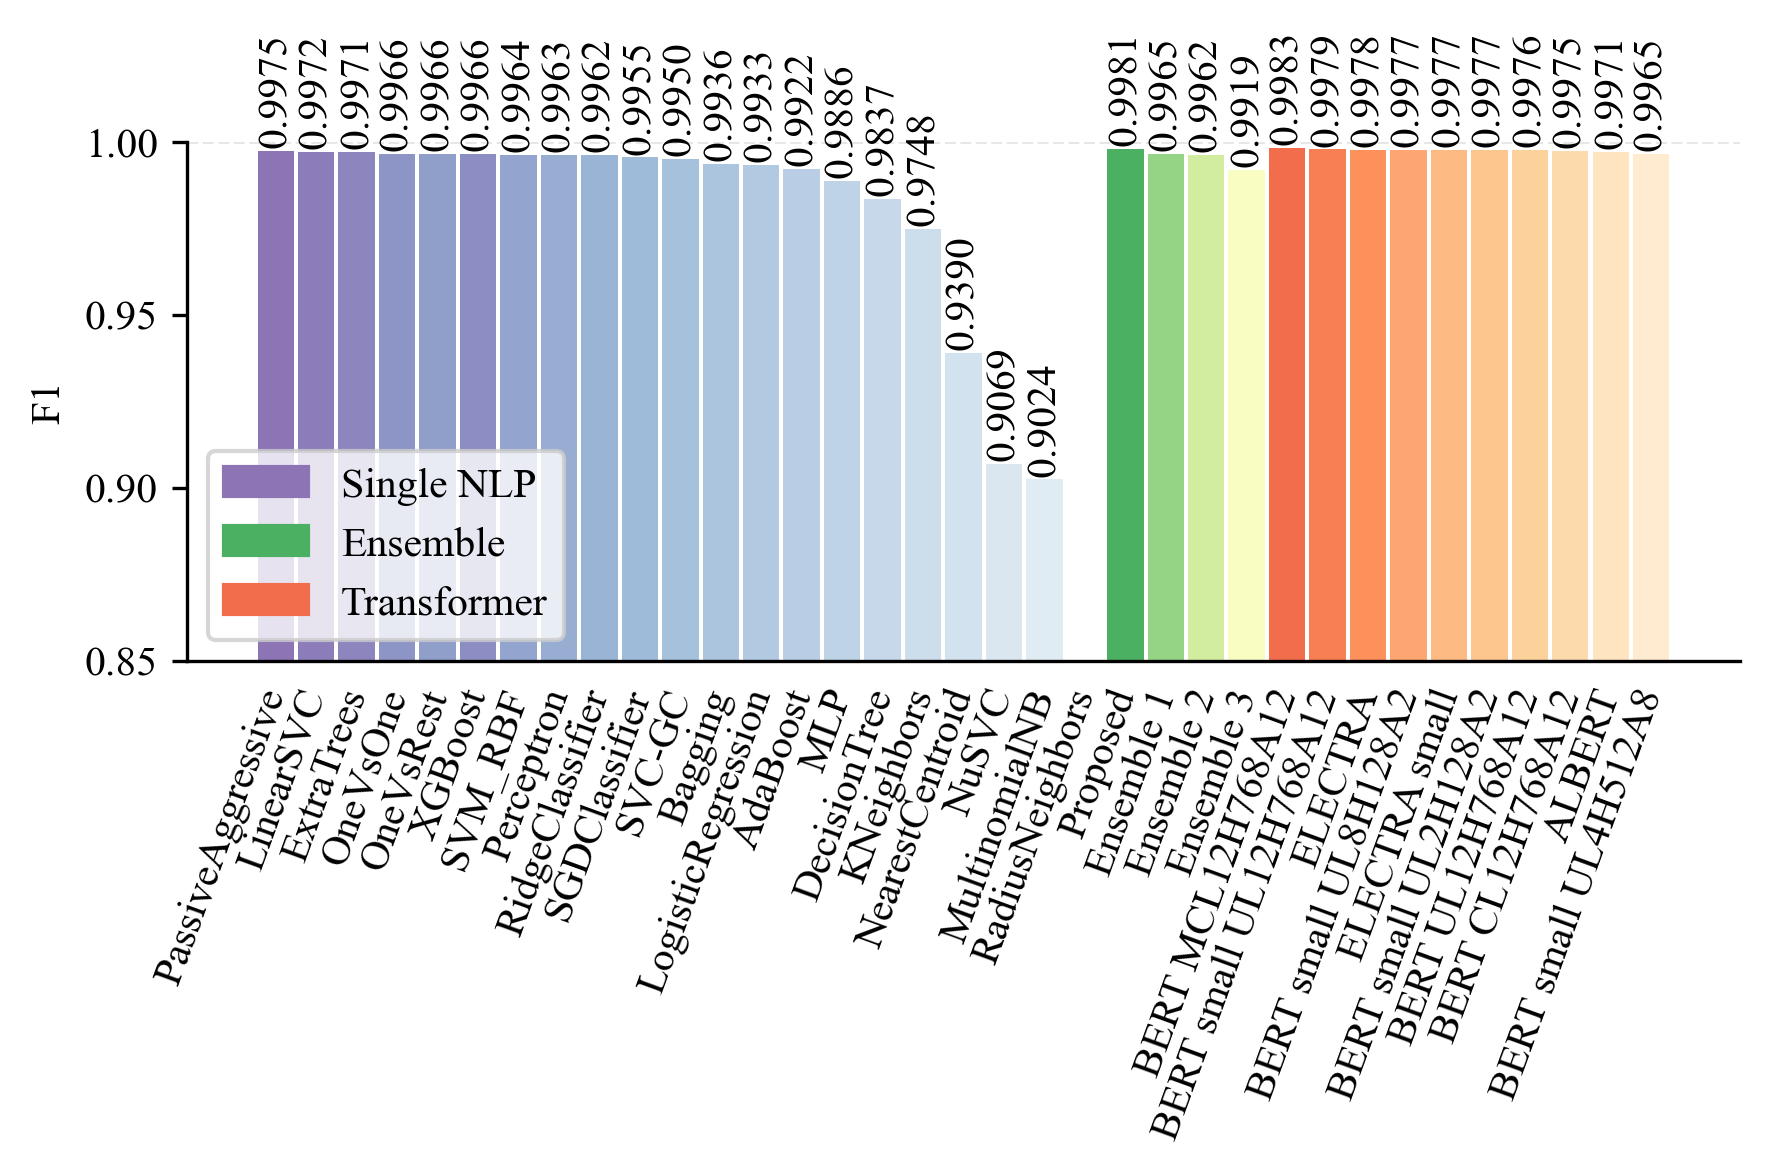

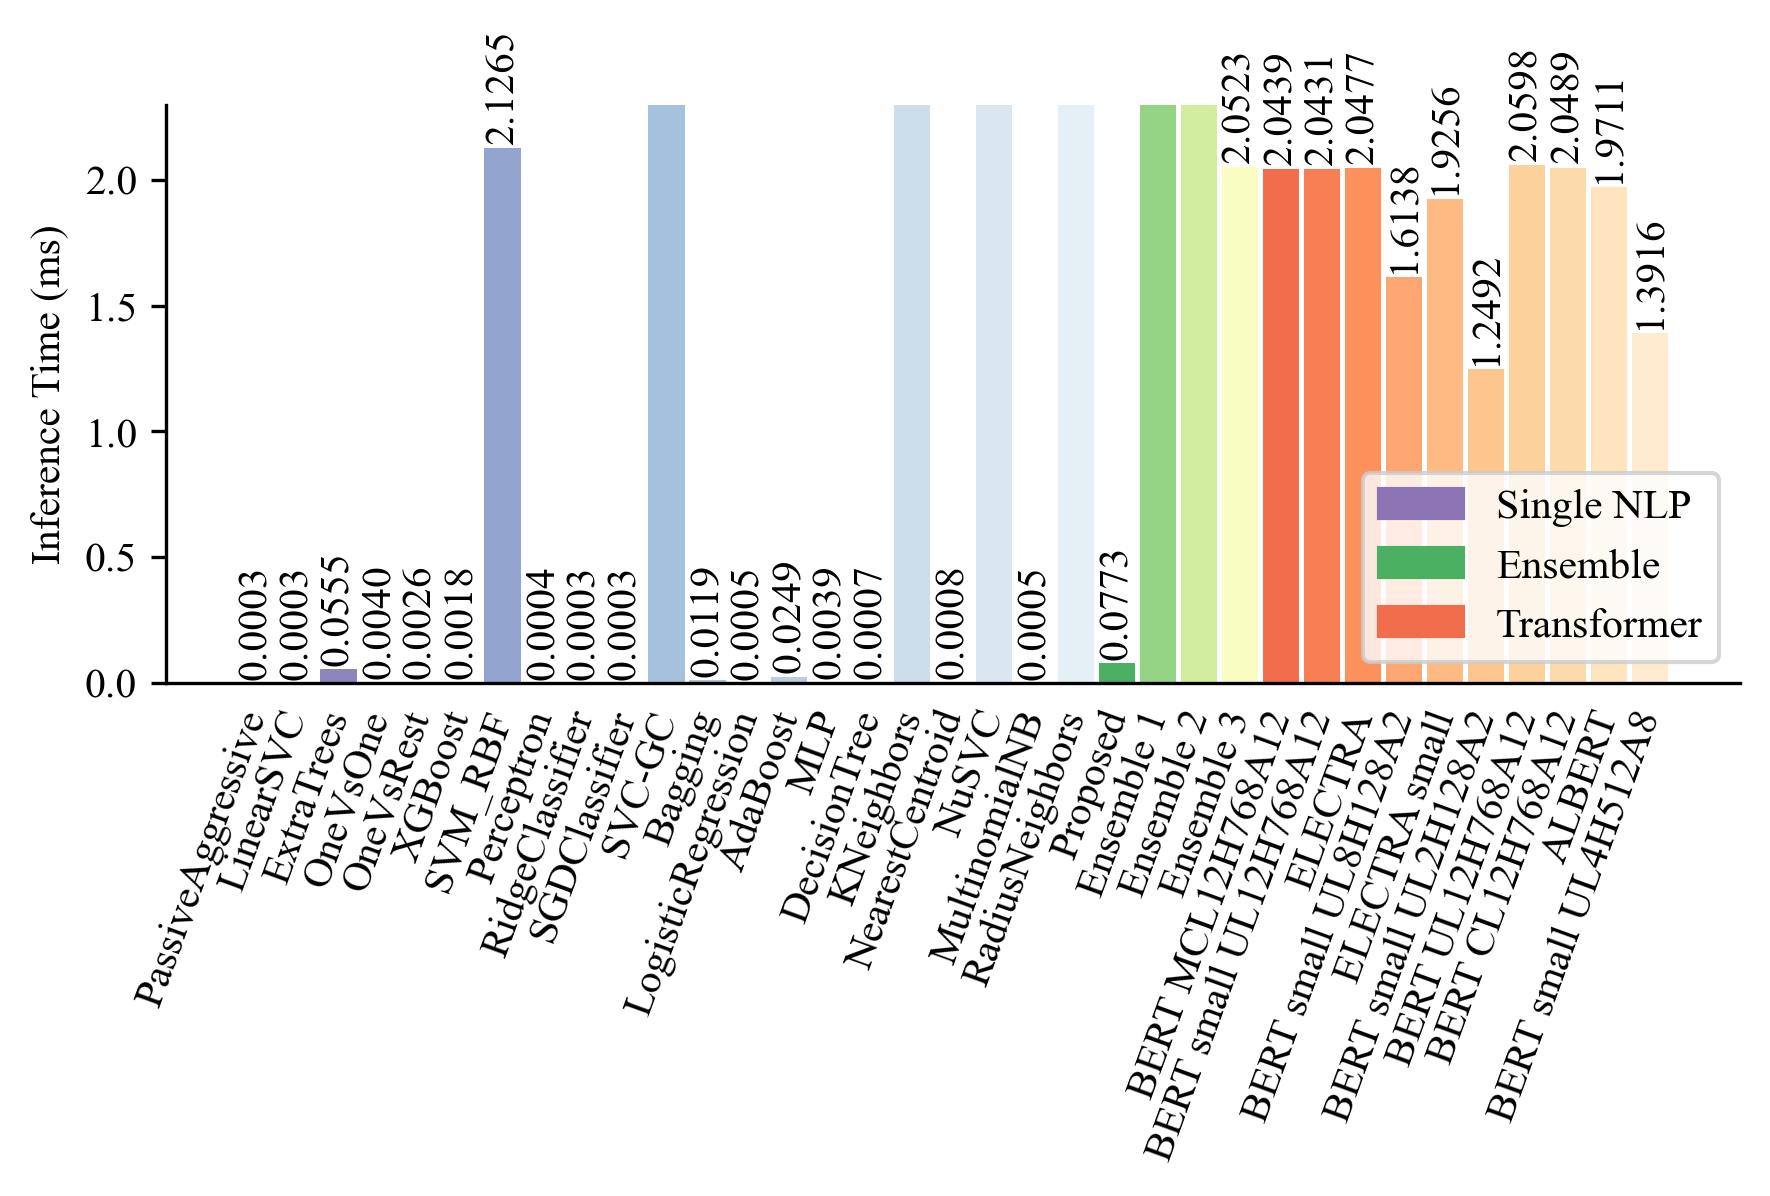

In [ ]:
# method_category = 'transformer'
# metrics = ['overall_accuracy', 'precision', 'recall', 'f1', 'training time',
#        'testing time', 'color']
import matplotlib.patches as mpatches
df_small = df.sort_values(['category','f1_score'],ascending=[True, False])
df_small = rename_table_labels(df_small)
#df_small = df.loc[methods[method_category], metrics]
#df_small = df_small.sort_values(['category','f1'],ascending=[True, False])

# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='classic_ml'] 
                         .head(1)['color'].values[0][0], dtype=np.float32) 
color_cat_2 = np.asarray(df_small[df_small['category']=='ensemble'] 
                         .head(1)['color'].values[0][0], dtype=np.float32) 
color_cat_3 = np.asarray(df_small[df_small['category']=='transformer'] 
                         .head(1)['color'].values[0][0], dtype=np.float32) 
legend_cat_1 = mpatches.Patch(color=color_cat_1, label='Single NLP')
legend_cat_2 = mpatches.Patch(color=color_cat_2, label='Ensemble')
legend_cat_3 = mpatches.Patch(color=color_cat_3, label='Transformer')

# Figure
current_figure_name = 'all_f1_sorted_f1.png'
fig, ax = plt.subplots(figsize=(6, 4))
my_plot_bar(df_small,ax,'F1')
plt.axhline(1, linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)
ax.set(ylim=(0.85, 1))
ax.set_ylabel('F1')
ax.legend(handles=[legend_cat_1, legend_cat_2, legend_cat_3],  loc='lower left')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)
###############################
current_figure_name = 'all_f1_sorted_inference_time.png'
fig, ax = plt.subplots(figsize=(6, 4))
my_plot_bar(df_small,ax,'Inference Time (ms)')
ax.set_ylabel('Inference Time (ms)')
ax.legend(handles=[legend_cat_1, legend_cat_2, legend_cat_3],  loc='lower right')
ax.set(ylim=(0.0, 2.3))
fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)

In [ ]:
def process_style_to_my_latex_format(df_latex):
    # returns style object
    s = df_latex.reset_index().style.hide_index()
    s = s.format(precision=4, escape="latex")
    return s

### Single NLP (F1 vs Inference)

In [ ]:
# Table: Single NLP
table_name = "single"
caption="Accuracy and inference speed of single classifier based NLP methods."
out_file_name = (table_folder / table_name).with_suffix('.tex') 
method_cat = 'classic_ml'
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 
           'tp','tn','fp','fn','train_time',
       'pred_time', 'color', 'category', 'Method']

df_small = df.loc[df['category']==method_cat,metrics]

df_small = rename_table_labels(df_small)
df_small.set_index('Method', inplace=True)
#print(df_small)

s = process_style_to_my_latex_format(df_small.drop(['color', 'category'], axis=1 ))

s = s.highlight_max(props='textbf:--rwrap;', subset=s.columns[1:-4])
s = s.highlight_min(props='textbf:--rwrap;', subset=s.columns[-4:])
s = s.format(precision=0, escape="latex", subset=s.columns[-6:-2])

if SAVE_OUTPUTS:
    s.to_latex(buf=out_file_name,
       column_format="lrrrrrrrrrr", position="htbp", position_float="centering",
       hrules=True, label=f"tab:{table_name}", caption=caption)

print(s.to_latex(
    column_format="lrrrrrrrrrr", position="ht", position_float="centering",
    hrules=True, label=f"table:{table_name}", caption=caption)
)
#df.loc[:,"training time"] / df.loc[:,"train size"]
#(df.loc[:,["training time", "testing time"]]*1000).div(df.loc[:,["train size", "test size"]])

\begin{table}[ht]
\centering
\caption{Accuracy and inference speed of single NLP methods.}
\label{table:single}
\begin{tabular}{lrrrrrrrrrr}
\toprule
{Method} & {Accuracy} & {Precision} & {Recall} & {F1} & {TP} & {TN} & {FP} & {FN} & {Training Time (ms)} & {Inference Time (ms)} \\
\midrule
AdaBoost & 0.9942 & 0.9962 & 0.9882 & 0.9922 & 2240 & 3846 & 9 & 27 & 0.8238 & 0.0249 \\
Bagging & 0.9953 & 0.9969 & 0.9904 & 0.9936 & 2245 & 3848 & 7 & 22 & 2.3887 & 0.0119 \\
DecisionTree & 0.9880 & 0.9950 & 0.9726 & 0.9837 & 2205 & 3844 & 11 & 62 & 0.0727 & 0.0007 \\
ExtraTrees & 0.9978 & 0.9995 & 0.9947 & 0.9971 & 2255 & 3854 & 1 & 12 & 0.4283 & 0.0555 \\
KNeighbors & 0.9815 & 0.9829 & 0.9668 & 0.9748 & 2192 & 3817 & 38 & 75 & 0.0005 & 31.6636 \\
LinearSVC & 0.9979 & 0.9996 & 0.9948 & 0.9972 & 2255 & 3854 & 1 & 12 & 0.0052 & \textbf{0.0003} \\
LogisticRegression & 0.9951 & 0.9986 & 0.9881 & 0.9933 & 2240 & 3852 & 3 & 27 & 0.0684 & 0.0005 \\
MLP & 0.9917 & 0.9982 & 0.9793 & 0.9886 & 2220 & 3851 & 

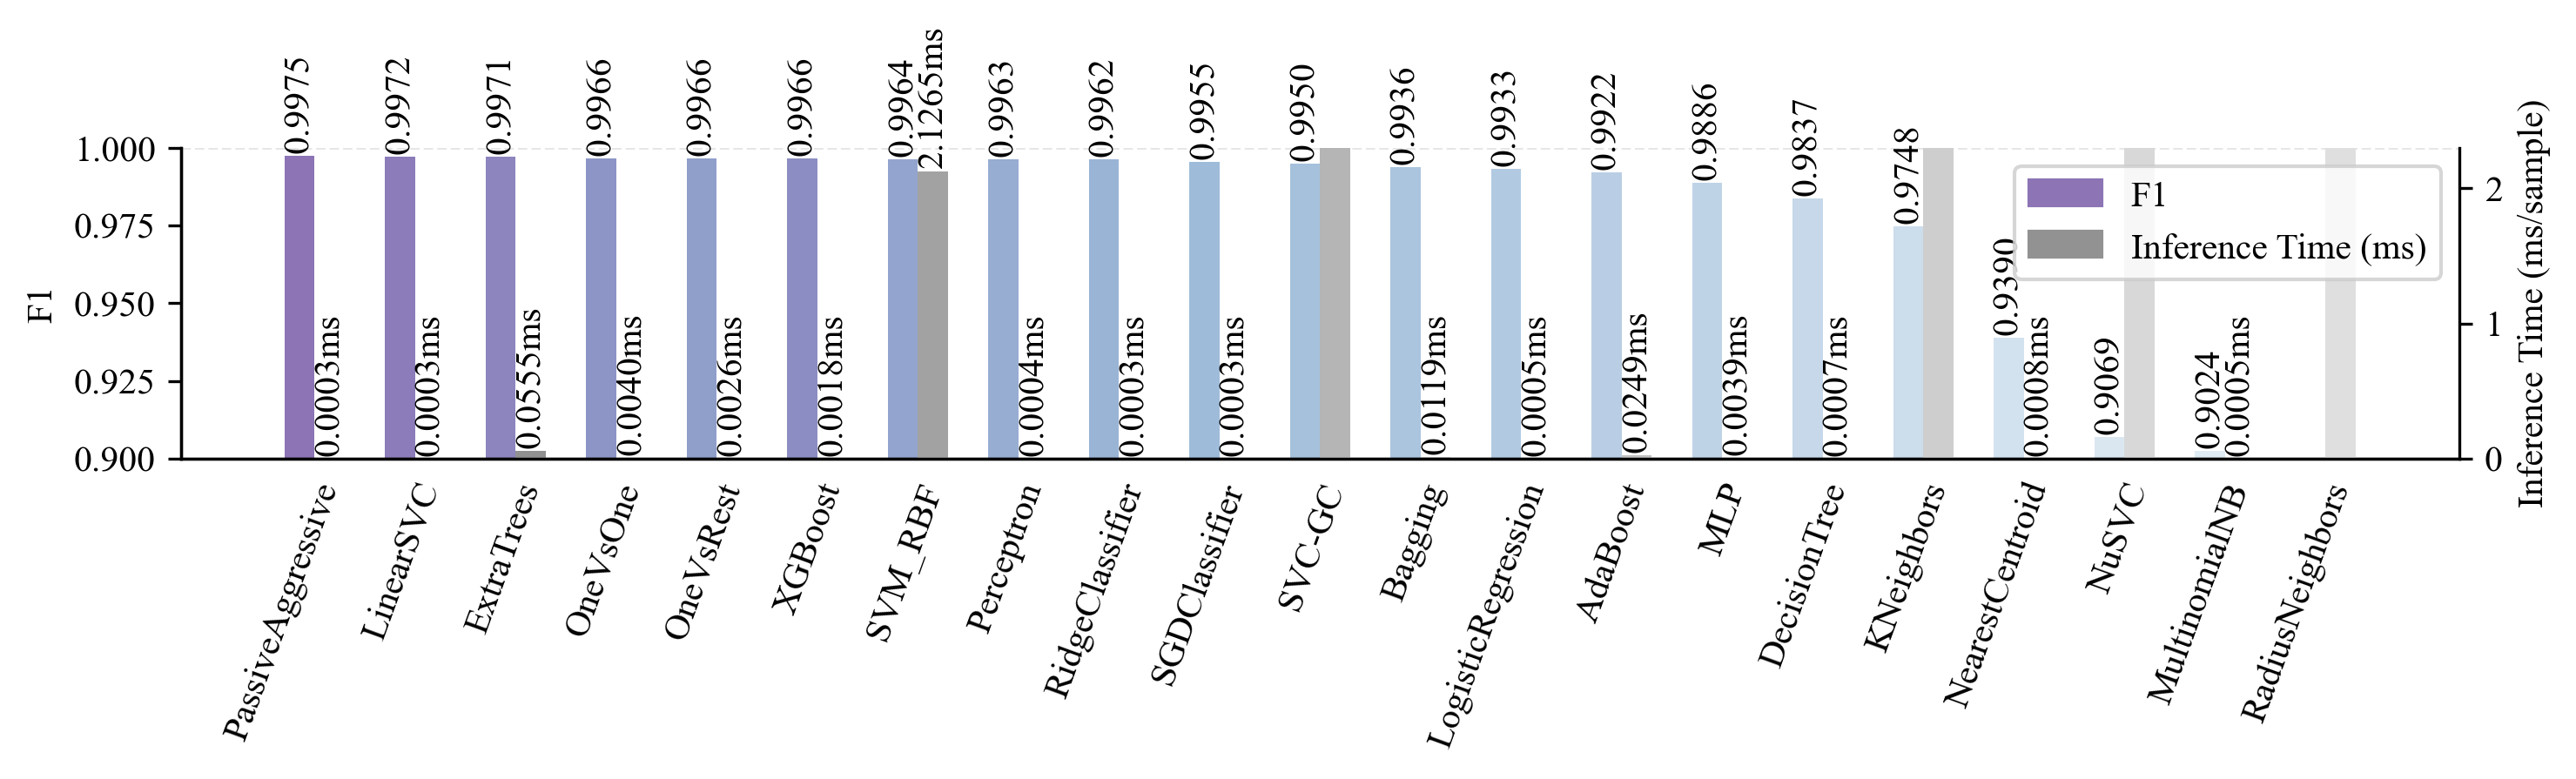

In [ ]:
# Figure of Table Single NLP
current_figure_name = 'single_nlp_f1_vs_time.png'
fig, ax = plt.subplots( figsize=(10,3))

metric = ['F1', 'Inference Time (ms)']
df_small = df_small.sort_values(metric,ascending=False)

# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='classic_ml'] 
                         .head(1)['color'].values[0][0], dtype=np.float32)
color_cat_1G = color_cat_1.copy()
color_cat_1G[0:3] = color_cat_1G[0:3].mean()

legend_cat_1 = mpatches.Patch(color=color_cat_1, label=metric[0])
legend_cat_1G = mpatches.Patch(color=color_cat_1G, label=metric[1])


df_small.reset_index(inplace=True)
_, ax2 = my_plot_twin_bar(df_small,ax,metric)
ax.axhline(1,  linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)
ax.set(ylim=(0.90, 1))
ax.set_ylabel('F1')

ax2.set_ylabel('Inference Time (ms/sample)')
ax2.set(ylim=(0.0, 2.3))
ax2.legend(handles=[legend_cat_1, legend_cat_1G],  loc='upper right')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax2.get_figure().savefig(figure_folder / current_figure_name)


### Table Ensemble NLP

In [ ]:
# Table: Ensemble NLP
table_name = "ensemble"
caption="Accuracy and inference speed of ensemble NLP methods."
out_file_name = (table_folder / table_name).with_suffix('.tex') 
method_cat = 'ensemble'
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 
           'tp','tn','fp','fn','train_time',
       'pred_time', 'color', 'category', 'Method']

df_small = df.loc[df['category']==method_cat,metrics]

df_small = rename_table_labels(df_small)
df_small.set_index('Method', inplace=True)
#print(df_small)

s = process_style_to_my_latex_format(df_small.drop(['color', 'category'], axis=1 ))


s = s.highlight_max(props='textbf:--rwrap;', subset=s.columns[1:-4])
s = s.highlight_min(props='textbf:--rwrap;', subset=s.columns[-4:])
s = s.format(precision=0, escape="latex", subset=s.columns[-6:-2])

if SAVE_OUTPUTS:
       s.to_latex(buf=out_file_name,
              column_format="lrrrrrrrrrr", position="htbp", position_float="centering",
              hrules=True, label=f"tab:{table_name}", caption=caption)

print(s.to_latex(
    column_format="lrrrrrrrrrr", position="ht", position_float="centering",
    hrules=True, label=f"table:{table_name}", caption=caption)
)

\begin{table}[ht]
\centering
\caption{Accuracy and inference speed of ensemble NLP methods.}
\label{table:ensemble}
\begin{tabular}{lrrrrrrrrrr}
\toprule
{Method} & {Accuracy} & {Precision} & {Recall} & {F1} & {TP} & {TN} & {FP} & {FN} & {Training Time (ms)} & {Inference Time (ms)} \\
\midrule
Ensemble 1 & 0.9974 & \textbf{0.9996} & 0.9934 & 0.9965 & 2252 & \textbf{3854} & \textbf{1} & 15 & 22.5116 & 3.5582 \\
Ensemble 2 & 0.9972 & 0.9996 & 0.9929 & 0.9962 & 2251 & \textbf{3854} & \textbf{1} & 16 & 22.5116 & 3.5620 \\
Ensemble 3 & 0.9940 & 0.9942 & 0.9896 & 0.9919 & 2243 & 3842 & 13 & 24 & \textbf{4.9306} & 2.0523 \\
Proposed & \textbf{0.9986} & 0.9996 & \textbf{0.9966} & \textbf{0.9981} & \textbf{2259} & \textbf{3854} & \textbf{1} & \textbf{8} & 68.7000 & \textbf{0.0773} \\
\bottomrule
\end{tabular}
\end{table}



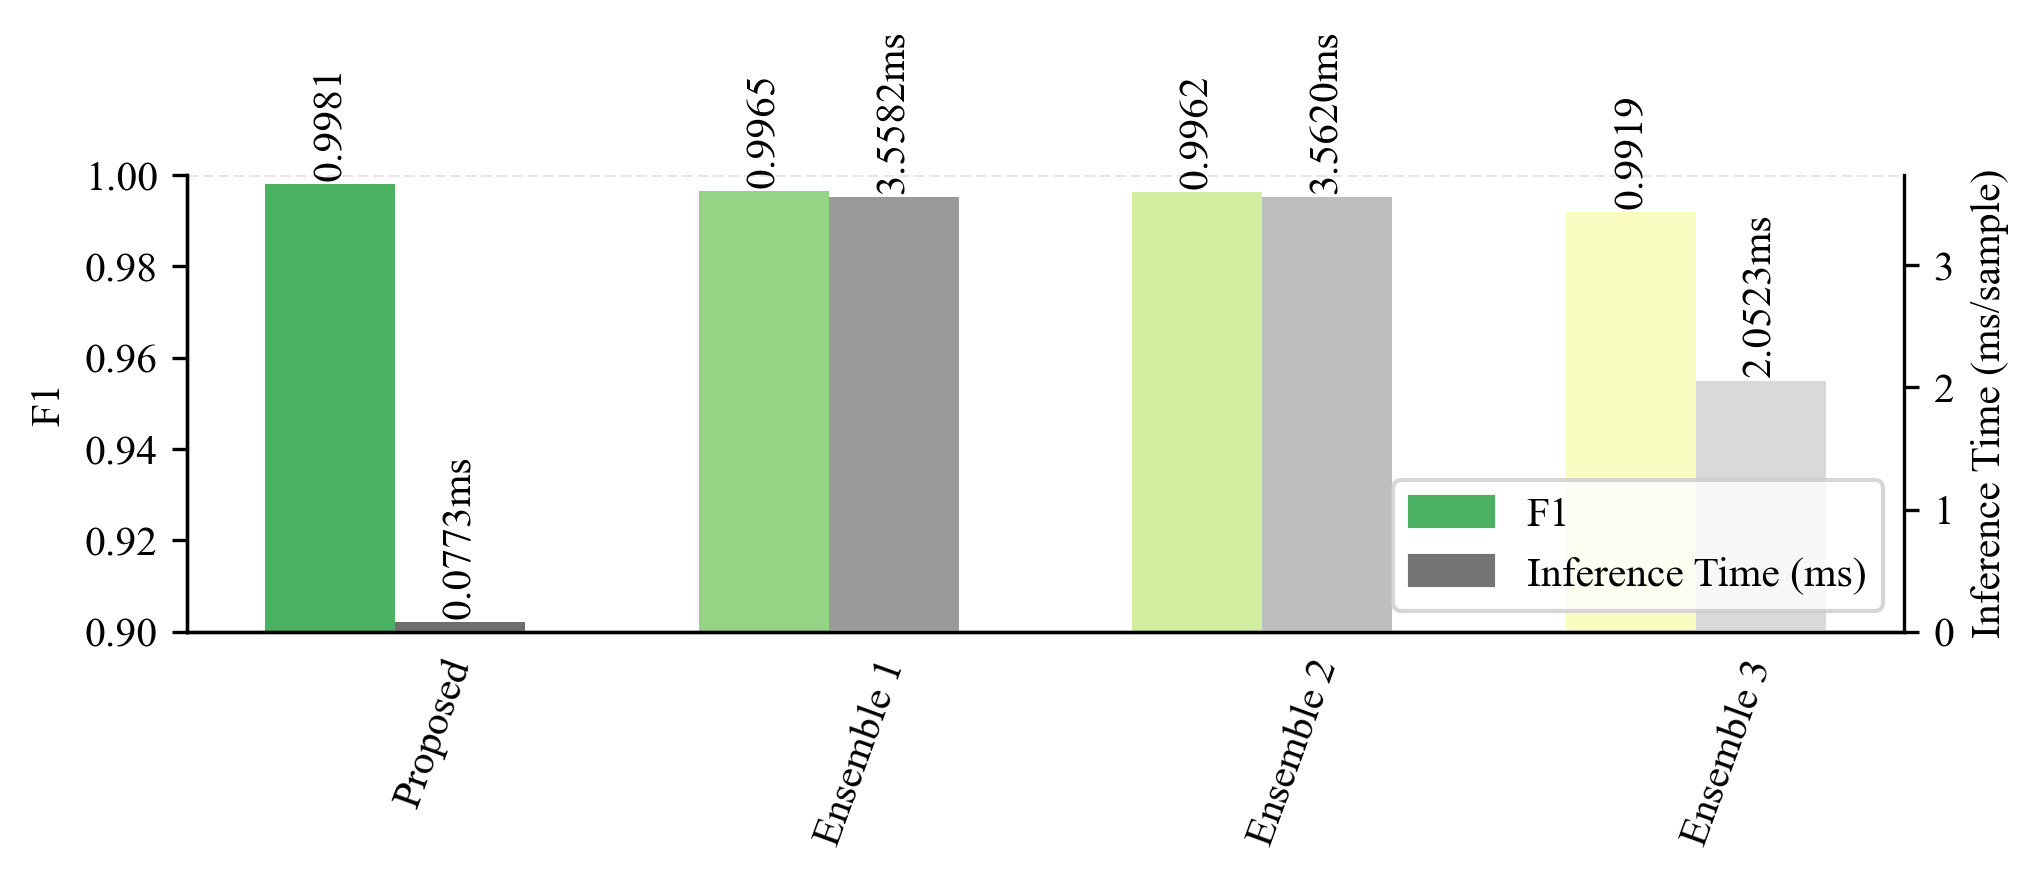

In [ ]:
# Figure of Table Ensemble NLP
current_figure_name = 'ensemble_nlp_f1_vs_time.png'
fig, ax = plt.subplots( figsize=(7,3))

metric = ['F1', 'Inference Time (ms)']
df_small = df_small.sort_values(metric,ascending=False)

# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='ensemble'] 
                         .head(1)['color'].values[0][0], dtype=np.float32)
color_cat_1G = color_cat_1.copy()
color_cat_1G[0:3] = color_cat_1G[0:3].mean()

legend_cat_1 = mpatches.Patch(color=color_cat_1, label=metric[0])
legend_cat_1G = mpatches.Patch(color=color_cat_1G, label=metric[1])


df_small.reset_index(inplace=True)
_, ax2 = my_plot_twin_bar(df_small,ax,metric)
ax.axhline(1,  linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)
ax.set(ylim=(0.90, 1))
ax.set_ylabel('F1')

ax2.set_ylabel('Inference Time (ms/sample)')
# #ax.set(ylim=(0.95, 1))
ax2.legend(handles=[legend_cat_1, legend_cat_1G],  loc='lower right')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax2.get_figure().savefig(figure_folder / current_figure_name)


### Transformers

In [ ]:
# Table: Transformer NLP
table_name = "transformer"
caption="Accuracy and inference speed of trasnformer based NLP methods."
out_file_name = (table_folder / table_name).with_suffix('.tex') 
method_cat = 'transformer'
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 
           'tp','tn','fp','fn','train_time',
       'pred_time', 'color', 'category', 'Method']

df_small = df.loc[df['category']==method_cat,metrics]

df_small = rename_table_labels(df_small)
df_small.set_index('Method', inplace=True)
#print(df_small)

s = process_style_to_my_latex_format(df_small.drop(['color', 'category'], axis=1 ))


s = s.highlight_max(props='textbf:--rwrap;', subset=s.columns[1:-4])
s = s.highlight_min(props='textbf:--rwrap;', subset=s.columns[-4:])
s = s.format(precision=0, escape="latex", subset=s.columns[-6:-2])

if SAVE_OUTPUTS:
       s.to_latex(buf=out_file_name,
              column_format="lrrrrrrrrrr", position="htbp", position_float="centering",
              hrules=True, label=f"tab:{table_name}", caption=caption)

print(s.to_latex(
    column_format="lrrrrrrrrrr", position="ht", position_float="centering",
    hrules=True, label=f"table:{table_name}", caption=caption)
)

\begin{table}[ht]
\centering
\caption{Accuracy and inference speed of trasnformer NLP methods.}
\label{table:transformer}
\begin{tabular}{lrrrrrrrrrr}
\toprule
{Method} & {Accuracy} & {Precision} & {Recall} & {F1} & {TP} & {TN} & {FP} & {FN} & {Training Time (ms)} & {Inference Time (ms)} \\
\midrule
ALBERT & 0.9978 & 0.9983 & 0.9958 & 0.9971 & 2258 & 3851 & 4 & 10 & 12.3332 & 1.9711 \\
BERT CL12H768A12 & 0.9982 & 0.9979 & 0.9972 & 0.9975 & 2261 & 3850 & 5 & 6 & 12.8636 & 2.0489 \\
BERT UL12H768A12 & 0.9983 & 0.9979 & 0.9974 & 0.9976 & 2262 & 3850 & 5 & 6 & 13.0167 & 2.0598 \\
BERT MCL12H768A12 & \textbf{0.9988} & 0.9993 & 0.9974 & \textbf{0.9983} & 2262 & 3853 & 2 & 6 & 14.5866 & 2.0439 \\
ELECTRA & 0.9984 & 0.9979 & \textbf{0.9978} & 0.9978 & \textbf{2262} & 3850 & 5 & \textbf{5} & 12.8706 & 2.0477 \\
ELECTRA small & 0.9983 & 0.9986 & 0.9968 & 0.9977 & 2260 & 3851 & 3 & 7 & 10.7674 & 1.9256 \\
BERT small UL12H768A12 & 0.9984 & 0.9983 & 0.9974 & 0.9979 & 2262 & 3851 & 4 & 6 & 12.7917 &

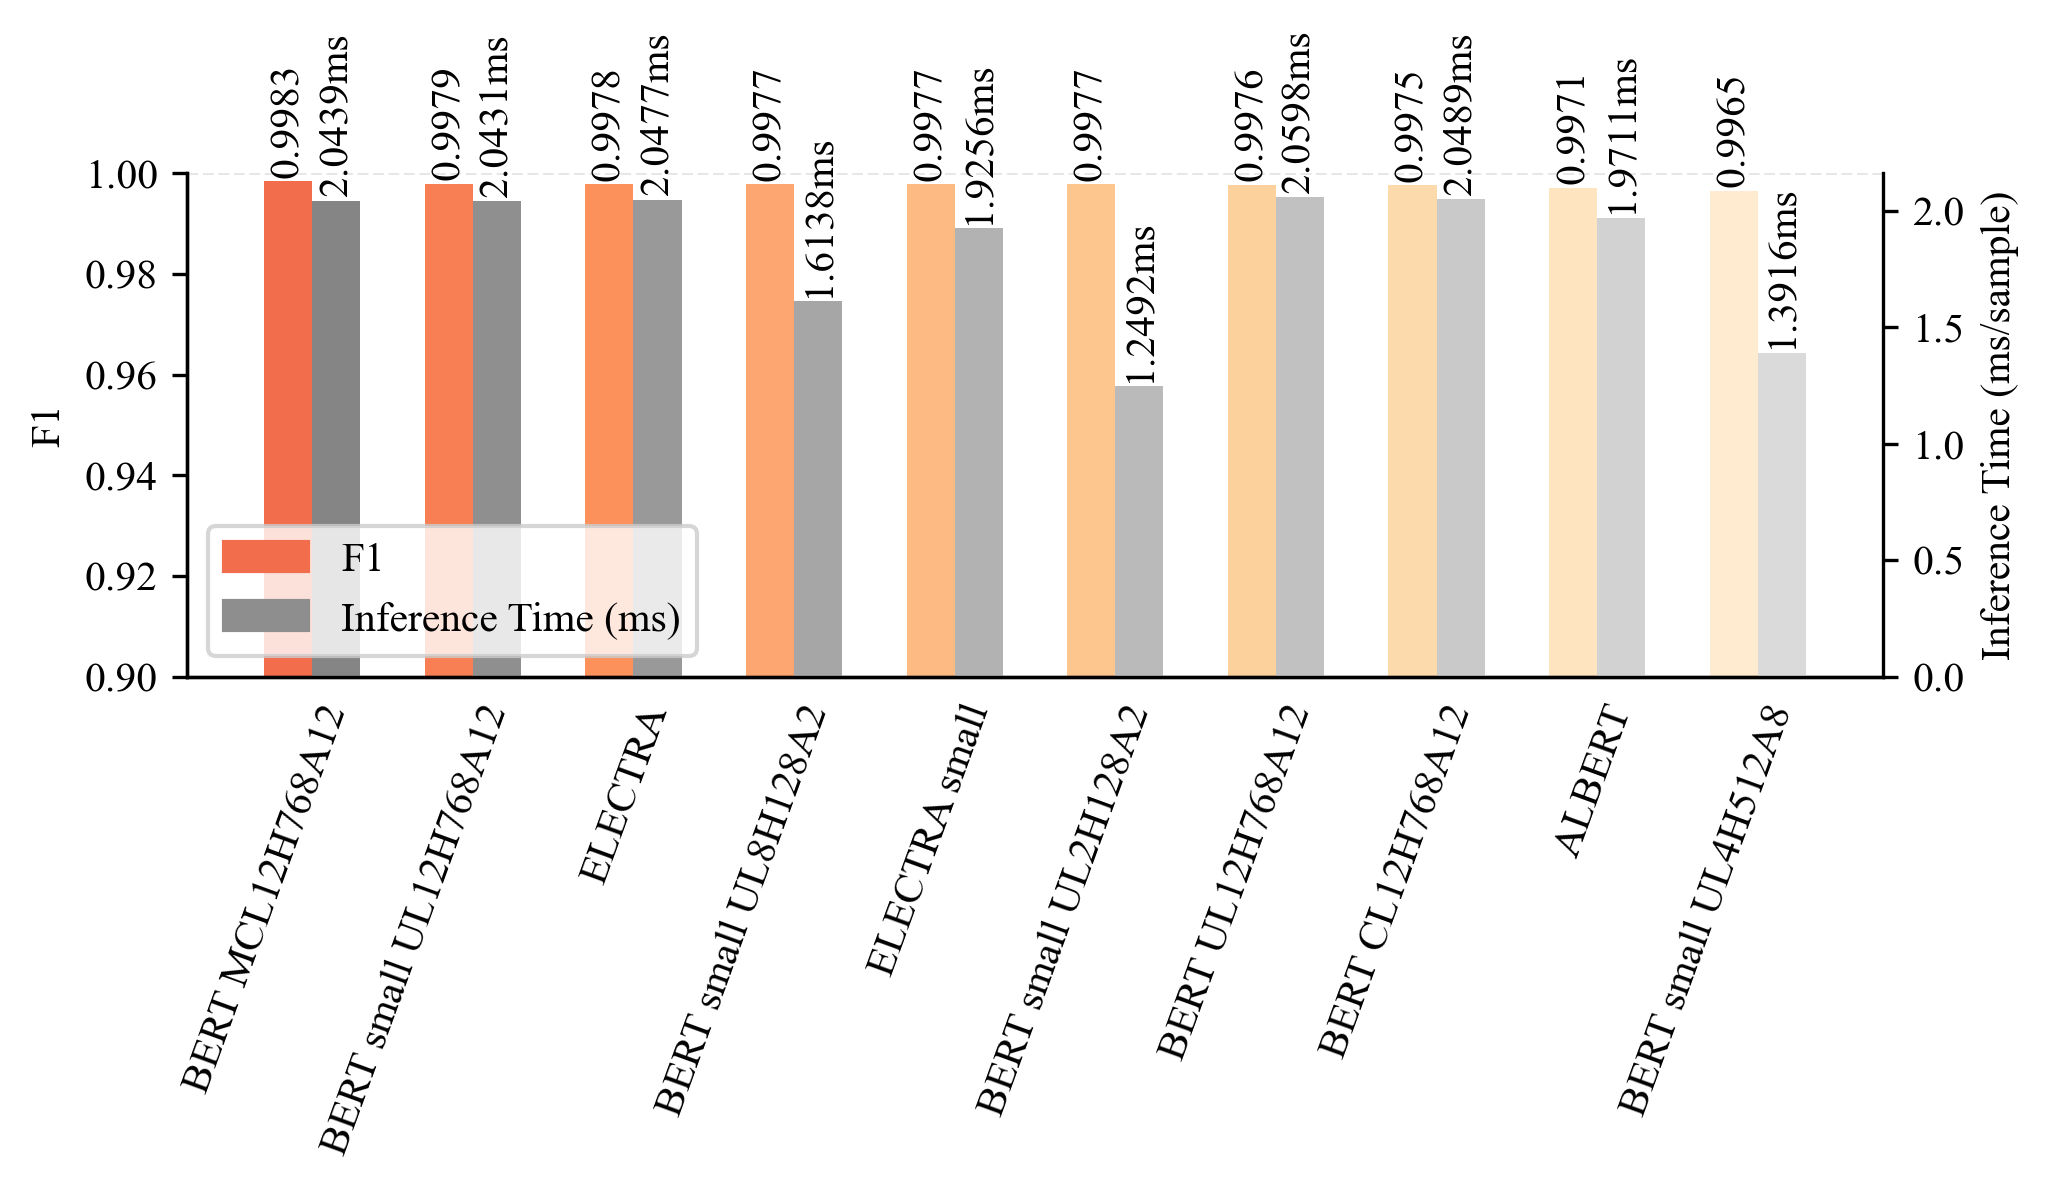

In [ ]:
# Figure of Table Transformer NLP
current_figure_name = 'transformer_nlp_f1_vs_time.png'
fig, ax = plt.subplots( figsize=(7,4))

metric = ['F1', 'Inference Time (ms)']
df_small = df_small.sort_values(metric,ascending=False)

# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='transformer'] 
                         .head(1)['color'].values[0][0], dtype=np.float32)
color_cat_1G = color_cat_1.copy()
color_cat_1G[0:3] = color_cat_1G[0:3].mean()

legend_cat_1 = mpatches.Patch(color=color_cat_1, label=metric[0])
legend_cat_1G = mpatches.Patch(color=color_cat_1G, label=metric[1])


df_small.reset_index(inplace=True)
_, ax2 = my_plot_twin_bar(df_small,ax,metric)
ax.axhline(1,  linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)
ax.set(ylim=(0.90, 1))
ax.set_ylabel('F1')


ax2.set_ylabel('Inference Time (ms/sample)')
# #ax.set(ylim=(0.95, 1))
ax2.legend(handles=[legend_cat_1, legend_cat_1G],  loc='lower left')
fig.tight_layout()
if SAVE_OUTPUTS:
    ax2.get_figure().savefig(figure_folder / current_figure_name)


### All methods FE score vs alpha

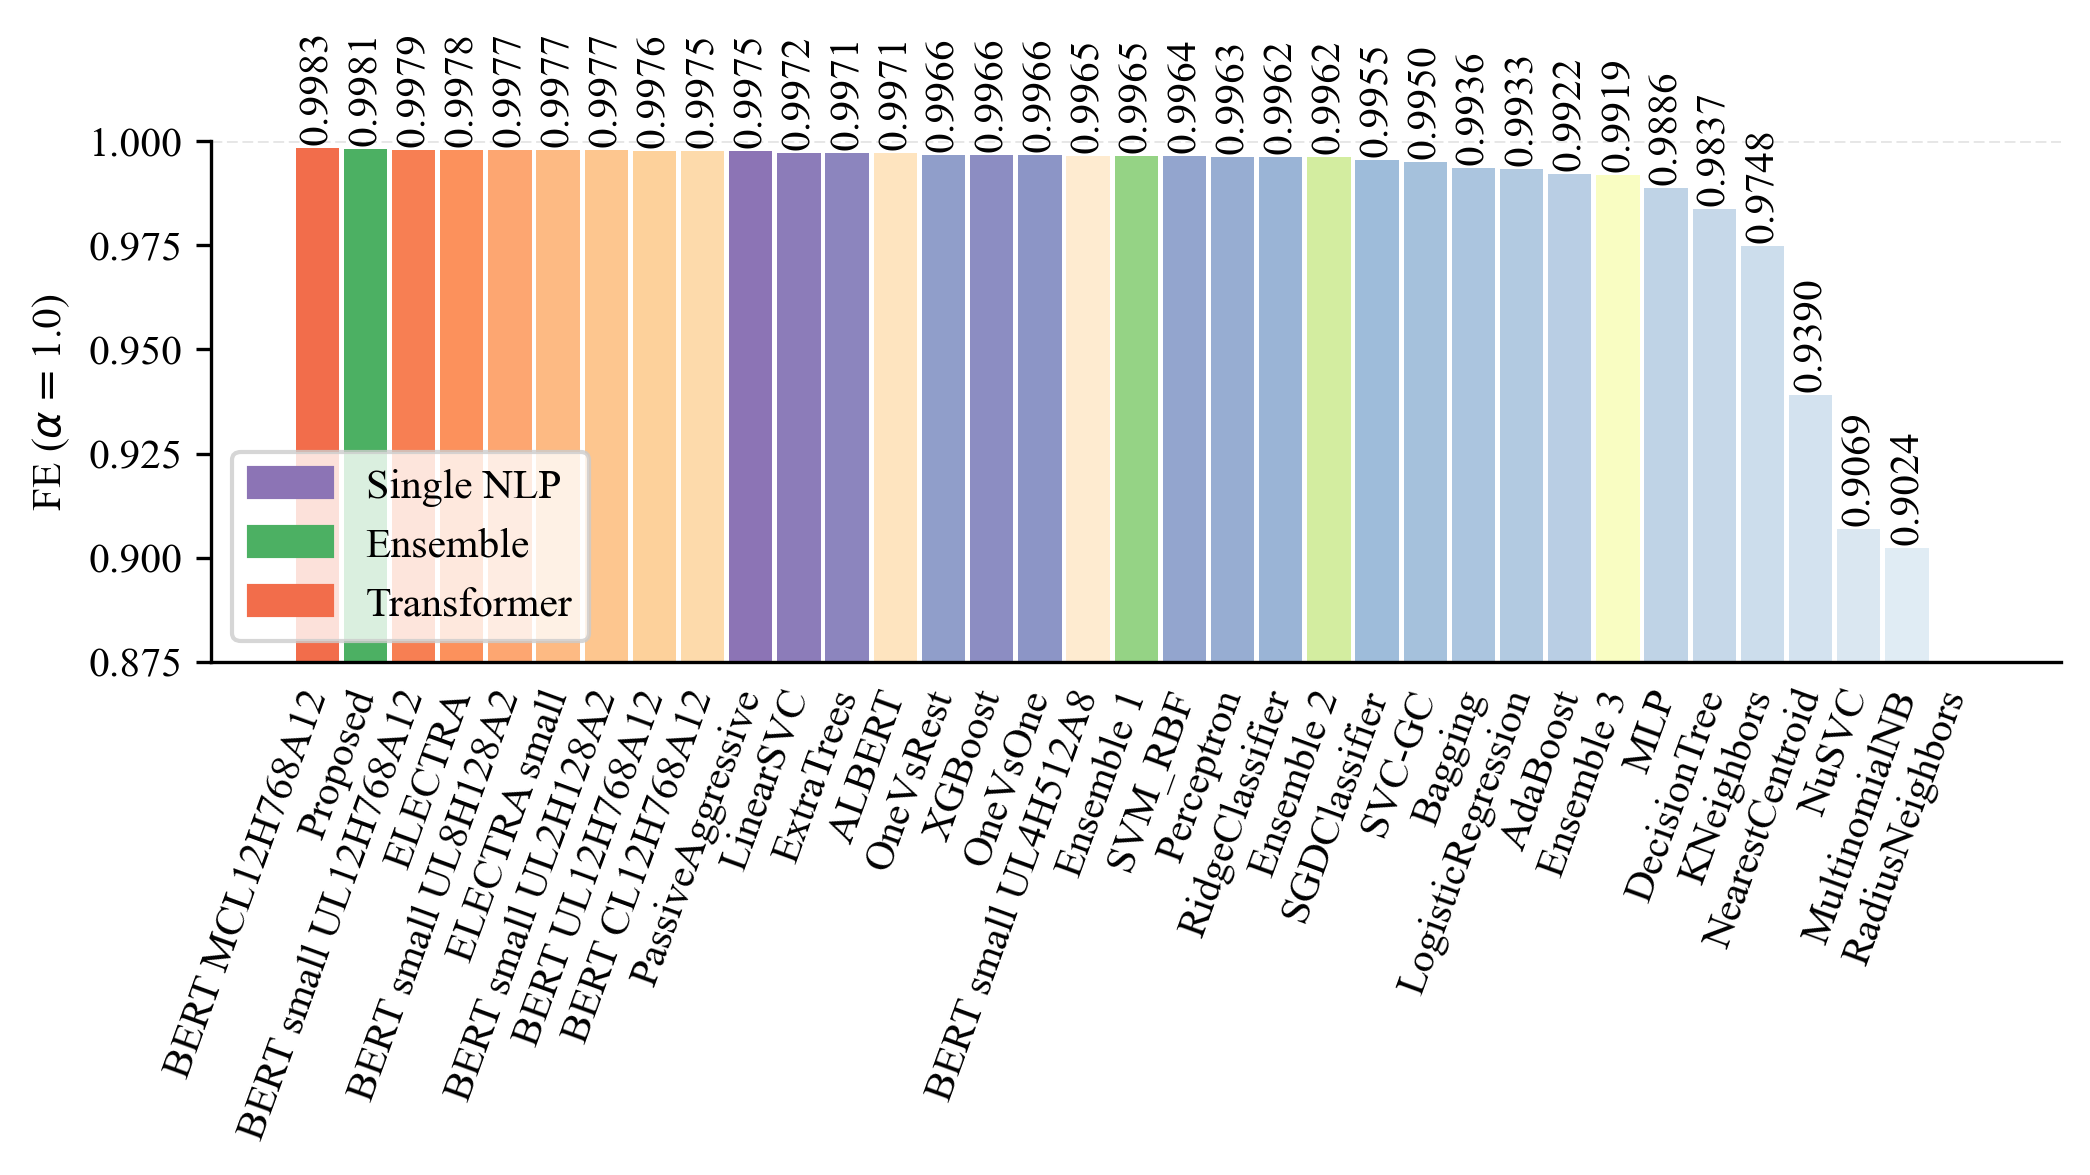

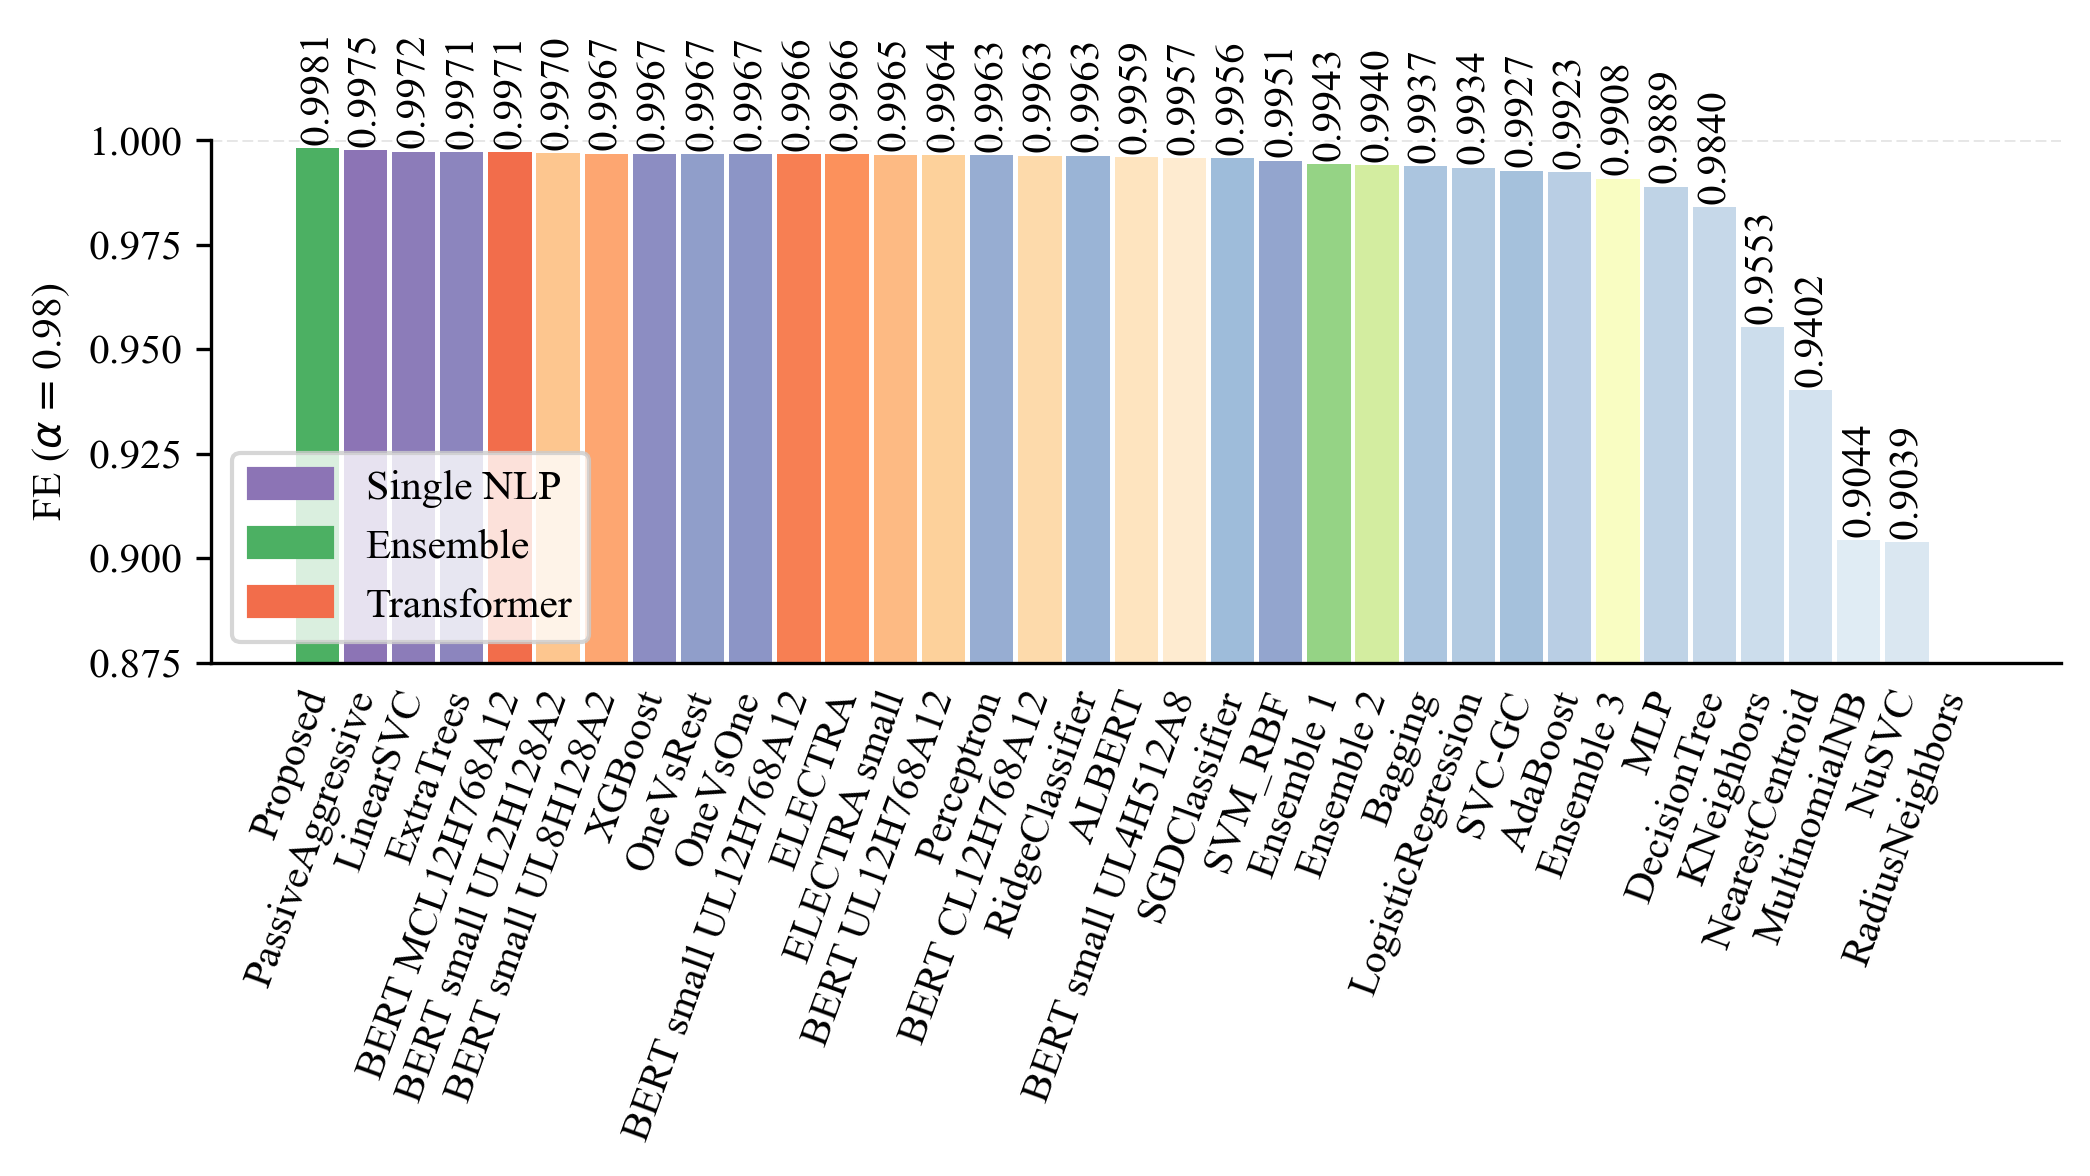

In [ ]:
#ALL FE comparison for different alpha
from sklearn import preprocessing

current_figure_name = 'all_nlp_FE_alpha_100.png'

#df_small = df.sort_values(['category','f1'],ascending=[True, False])
df_small = df.sort_values('f1_score',ascending=False)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(1.0000 - df_small['pred_time'].to_numpy().reshape(-1, 1))
df_small['inference scaled'] = x_scaled

alpha = 1.0
#alpha=1.00 #emphasis on F1 rather than speed
df_small['FE_100'] = alpha*df_small['f1_score'] + (1-alpha)*df_small['inference scaled']
#print(df_small)
alpha = 0.98
df_small['FE_098'] = alpha*df_small['f1_score'] + (1-alpha)*df_small['inference scaled']

df_small = rename_table_labels(df_small)



# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='classic_ml'] 
                         .head(1)['color'].values[0][0], dtype=np.float32) 
color_cat_2 = np.asarray(df_small[df_small['category']=='ensemble'] 
                         .head(1)['color'].values[0][0], dtype=np.float32) 
color_cat_3 = np.asarray(df_small[df_small['category']=='transformer'] 
                         .head(1)['color'].values[0][0], dtype=np.float32) 
legend_cat_1 = mpatches.Patch(color=color_cat_1, label='Single NLP')
legend_cat_2 = mpatches.Patch(color=color_cat_2, label='Ensemble')
legend_cat_3 = mpatches.Patch(color=color_cat_3, label='Transformer')

# Figure
fig, ax = plt.subplots(figsize=(7, 4))
df_small = df_small.sort_values('FE_100',ascending=False)

my_plot_bar(df_small,ax,'FE_100')
plt.axhline(1, linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)

ax.set_ylabel('FE'+ r' ($\alpha=$' + f'{1.0})')
#ax.set_xlabel(r'$\alpha=$' + f'{alpha}')
ax.set(ylim=(0.875, 1))
ax.legend(handles=[legend_cat_1, legend_cat_2, legend_cat_3],  loc='lower left')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)

#########################
current_figure_name = 'all_nlp_FE_alpha_090.png'
fig, ax = plt.subplots(figsize=(7, 4))
df_small = df_small.sort_values('FE_098',ascending=False)
my_plot_bar(df_small,ax,'FE_098')
plt.axhline(1, linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)
ax.set_ylabel('FE'+ r' ($\alpha=$' + f'{0.98})')
#ax.set_xlabel()
ax.set(ylim=(0.875, 1))
ax.legend(handles=[legend_cat_1, legend_cat_2, legend_cat_3],  loc='lower left')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)

# End